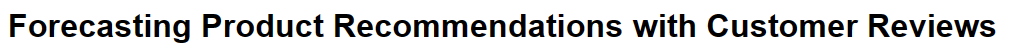

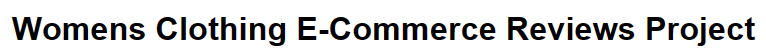

# Exploratory Data Analysis (EDA)

## Load the Libraries and the Data

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [106]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

* Burada Unnamed sutunu index numaralarini barindiriyor. Zaten bir index sutunumuz var, unnamed'e gerek yok, onu drop edelim.

* Ayrica "Clothing ID" den de bir cikarim yapmamiz zor, o sutunu da drop edelim.

In [107]:
df.drop(columns=["Unnamed: 0", "Clothing ID"], inplace=True)

##  About Data

**Değişken Bilgileri:**

**Clothing ID:** İnceleme yapılan ürünü belirten tam sayısal bir kategorik değişken.

**Age:** İncelemeyi yapan kişinin yaşı, pozitif tam sayısal bir değişken.

**Title:** İncelemenin başlığını içeren bir metin değişkeni.

**Review Text:** İncelemenin gövdesini içeren bir metin değişkeni.

**Rating:** Müşterinin verdiği ürün puanı, 1 En Kötü'den 5 En İyi'ye kadar pozitif sıralı bir tam sayı değişkeni.

**Recommended IND:** Ürünü önerip önermediğini belirten ikili bir değişken; 1 öneriyor, 0 önermiyor.

**Positive Feedback Count:** İncelemeyi olumlu bulan diğer müşterilerin sayısını belirten pozitif tam sayı değişkeni.

**Division Name:** Ürünün yüksek seviye bölümünün kategorik adı.

**Department Name:** Ürünün bölümünün kategorik adı.

**Class Name:** Ürünün sınıfının kategorik adı.

**Bu projenin temel amacı:** Müşterilerin inceleme metinleri kullanılarak satın aldıkları ürünü tavsiye edip etmediklerini tahmin etmektir. 

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      23486 non-null  int64 
 1   Title                    19676 non-null  object
 2   Review Text              22641 non-null  object
 3   Rating                   23486 non-null  int64 
 4   Recommended IND          23486 non-null  int64 
 5   Positive Feedback Count  23486 non-null  int64 
 6   Division Name            23472 non-null  object
 7   Department Name          23472 non-null  object
 8   Class Name               23472 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.6+ MB


In [109]:
df.shape

(23486, 9)

**Yorum:** Veri seti 23,486 satır ve 9 sütun değişkeninden oluşmaktadir.  

In [110]:
df. isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

## Handling with Null Values

* Bos musteri yorumlarini bizim doldurmamiz mumkun olmayacagi icin o satirlari (gozlemleri) analizden çıkartıyoruz.

* Benzer sekilde Division Name, Department Name  ve Class Name'de de bos olan satirlari siliyoruz.

* Title sutununda cok fazla bos deger var, bu sutunu siliyoruz.

In [111]:
# Review Text  sutununda bos olan (yorum bulunmayan) satirlari siellim;

df.dropna(subset=["Review Text", "Division Name", "Department Name", "Class Name"], inplace=True)

In [112]:
# Title sutununu drop edelim;
df.drop('Title', axis=1, inplace=True)

In [113]:
df. isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [114]:
df.shape

(22628, 8)

**Yorum:** Veri setinde eksik deger kalmadi. Gozlem sayisi 23,486'dan 22,628'e; sutun sayisi da 11'den 8'e dustu. 

## Descriptive Statistics

In [115]:
df.describe().T

count       mean        std   min   25%   50%  \
Age                      22628.0  43.282880  12.328176  18.0  34.0  41.0   
Rating                   22628.0   4.183092   1.115911   1.0   4.0   5.0   
Recommended IND          22628.0   0.818764   0.385222   0.0   1.0   1.0   
Positive Feedback Count  22628.0   2.631784   5.787520   0.0   0.0   1.0   

                          75%    max  
Age                      52.0   99.0  
Rating                    5.0    5.0  
Recommended IND           1.0    1.0  
Positive Feedback Count   3.0  122.0

**Yorum:** Urun incelemesini yapan bayanlarin yas ortalamasai 43.28 olup, 34 ile 99 yas arasinda degisen kisiler bulunmaktadir. 

Urunlere verilen skorlarin ortalamasi 4.18 olup, gorece yuksektir. Bu da urunlerin, reviewers tarafindan begenildigini gostermektedir. 

## Correlation Analysis

In [116]:
df.corr()

Age    Rating  Recommended IND  \
Age                      1.000000  0.030121         0.034312   
Rating                   0.030121  1.000000         0.792543   
Recommended IND          0.034312  0.792543         1.000000   
Positive Feedback Count  0.040807 -0.060845        -0.065833   

                         Positive Feedback Count  
Age                                     0.040807  
Rating                                 -0.060845  
Recommended IND                        -0.065833  
Positive Feedback Count                 1.000000

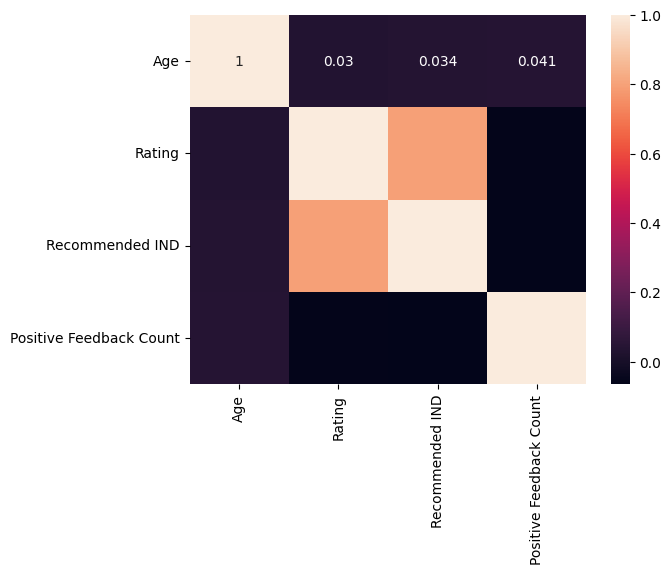

In [117]:
sns.heatmap(df.corr(), annot = True)
plt.show()

**Yorum:** Urunu icleyen kisiler tarafindan verilen "rating skoru" ile urunu onerip onermediklerine yonelik "Recommended IND" arasinda yuksek korelasyon vardir. 

## Visulization

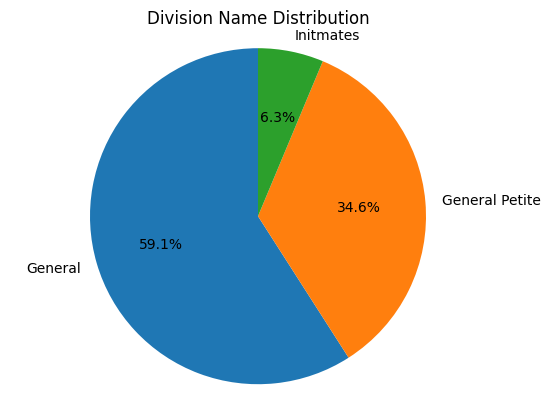

In [118]:
# Urunlerin Division Name'lere gore dagilimi; 

# "Division Name" sütununda her bir kategorinin sayısını al
counts = df['Division Name'].value_counts()

# Pie plot çiz
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

# Pie plot'u daha okunabilir yapmak için
plt.axis('equal')  

plt.title('Division Name Distribution')
plt.show()

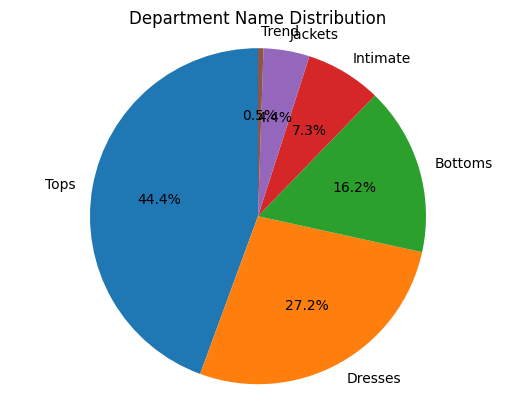

In [119]:
# Urunlerin Division Name'lere gore dagilimi; 

# "Division Name" sütununda her bir kategorinin sayısını al
counts = df['Department Name'].value_counts()

# Pie plot çiz
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

# Pie plot'u daha okunabilir yapmak için
plt.axis('equal')  

plt.title('Department Name Distribution')
plt.show()

In [120]:
counts = df['Class Name'].value_counts()

# Çubuk grafiği çiz
plt.figure(figsize=(10, 6))  # Grafiğin boyutunu ayarlayabilirsiniz
sns.barplot(x=counts.index, y=counts)

# x eksenindeki etiketleri daha okunabilir yapmak için
plt.xticks(rotation=90)  # Etiketleri 90 derece döndür

plt.xlabel('Class Name')
plt.ylabel('Count')
plt.title('Class Name Distribution')
plt.show()

In [121]:
# En çok görülen 8 kategoriyi al
top_8_classes = df['Class Name'].value_counts().nlargest(8).index

# 'Class Name' sütununu düzenle: Top 8 dışındakileri 'Other' olarak etiketle
df['Class Name'] = df['Class Name'].apply(lambda x: x if x in top_8_classes else 'Other')

# Güncellenmiş 'Class Name' sütununda her bir kategorinin sayısını al
counts = df['Class Name'].value_counts()

# Pie plot çiz
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

# Pie plot'u daha okunabilir yapmak için
plt.axis('equal')

# Başlık ekleyin
plt.title('Class Name Distribution')

plt.show()


In [122]:
# Urunlere verilen rating skorlarina bakalim;
ax = sns.countplot(data =df, x ="Rating")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90)
plt.title("Rating (Number)")
plt.show()

In [123]:
# Sutunlarin ustune % oranlari yazdiralim; 
ax = sns.countplot(data=df, x="Rating")
total = len(df["Rating"])

# Sütunların üzerine yüzde oranını yazdır.
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)
plt.title("Rating (Percentile)")
plt.xticks(rotation=90)
plt.show()

**Yorum:** Musteriler urunlerun %55.9'una 5 (en iyi), %21.6'sina 4 (iyi) seklinde  skor vermisler ki bu durum; musterilerin genel olarak bu urunlerden memnun oldugunu gostermektedir. 

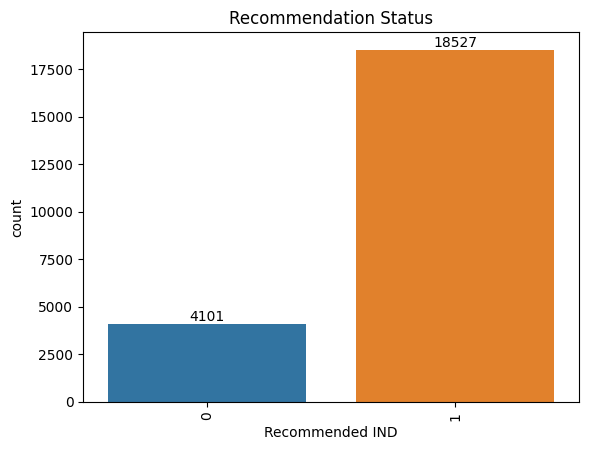

In [124]:
# Incelenen urunlerintavsiye edilme durumlarina bakalim; 
ax = sns.countplot(data =df, x ="Recommended IND")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90)
plt.title("Recommendation Status")
plt.show()

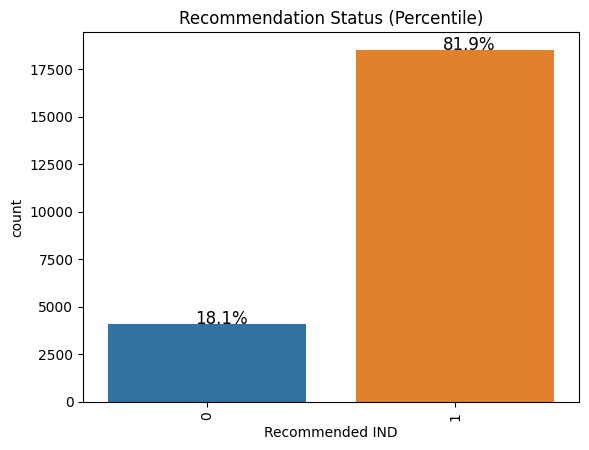

In [125]:
# Sutunlarin ustune % oranlari yazdiralim; 
ax = sns.countplot(data=df, x="Recommended IND")
total = len(df["Recommended IND"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)
plt.title("Recommendation Status (Percentile)")
plt.xticks(rotation=90)
plt.show()
#Bu kod, her bir sütunun yüksekliğini alır, yüzde oranını hesaplar ve bu oranı ilgili sütunun üzerine yazar. 
# Yüzde oranları, yuvarlak sayılar halinde gösterilmiştir ('{:.1f}%').

**Yorum:** Urunleri inceleyen kisiler bu urunlerin %82.2'sini diger musterilere onermislerdir / tavdiye etmislerdir.  

In [126]:
plt.figure(figsize=(12,8))
ax = sns.histplot(data =df, x ="Age", kde=True)
ax.bar_label(ax.containers[0], label_type="edge", fontsize=10, rotation=90)
plt.xticks(rotation =90)
plt.show()

**Yorum:**  Urunlere yorum yapanlarin buyuk cogunlugunun 30-50 yas araligindaki kisiler oldugu gorulmektedir.  

# Feature Selection and Data Cleaning
## Select the Necessary Columns

In [127]:
df.columns

Index(['Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [128]:
# Analizde kullanacagimiz sutunlari cekelim;
df=df[["Review Text", "Recommended IND"]]
df

Review Text  Recommended IND
0      Absolutely wonderful - silky and sexy and comf...                1
1      Love this dress!  it's sooo pretty.  i happene...                1
2      I had such high hopes for this dress and reall...                0
3      I love, love, love this jumpsuit. it's fun, fl...                1
4      This shirt is very flattering to all due to th...                1
...                                                  ...              ...
23481  I was very happy to snag this dress at such a ...                1
23482  It reminds me of maternity clothes. soft, stre...                1
23483  This fit well, but the top was very see throug...                0
23484  I bought this dress for a wedding i have this ...                1
23485  This dress in a lovely platinum is feminine an...                1

[22628 rows x 2 columns]

In [129]:
# Sutun adlarini degistirelim; 
df.rename(columns={'Review Text': 'text', 'Recommended IND': 'recommend'}, inplace=True)
df

text  recommend
0      Absolutely wonderful - silky and sexy and comf...          1
1      Love this dress!  it's sooo pretty.  i happene...          1
2      I had such high hopes for this dress and reall...          0
3      I love, love, love this jumpsuit. it's fun, fl...          1
4      This shirt is very flattering to all due to th...          1
...                                                  ...        ...
23481  I was very happy to snag this dress at such a ...          1
23482  It reminds me of maternity clothes. soft, stre...          1
23483  This fit well, but the top was very see throug...          0
23484  I bought this dress for a wedding i have this ...          1
23485  This dress in a lovely platinum is feminine an...          1

[22628 rows x 2 columns]

### Is Data Balanced or Not?

In [130]:
df["recommend"].value_counts()     # unbalance bir data.

1    18527
0     4101
Name: recommend, dtype: int64

### Change Negative as 1

In [131]:
# Hedef yorumlari 1 yapalim;
df.recommend = df.recommend.map({1:0, 0:1}) # Biz problemli olanlari incelemk istedigimiz icin negatif yorumlari (0)  1 yaptik.

In [132]:
df["recommend"].value_counts() # unbalance bir data.

0    18527
1     4101
Name: recommend, dtype: int64

## Copy the Data

In [133]:
df2 = df.copy()

In [134]:
df = df2
df

text  recommend
0      Absolutely wonderful - silky and sexy and comf...          0
1      Love this dress!  it's sooo pretty.  i happene...          0
2      I had such high hopes for this dress and reall...          1
3      I love, love, love this jumpsuit. it's fun, fl...          0
4      This shirt is very flattering to all due to th...          0
...                                                  ...        ...
23481  I was very happy to snag this dress at such a ...          0
23482  It reminds me of maternity clothes. soft, stre...          0
23483  This fit well, but the top was very see throug...          1
23484  I bought this dress for a wedding i have this ...          0
23485  This dress in a lovely platinum is feminine an...          0

[22628 rows x 2 columns]

In [135]:
df["text"].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: text, dtype: object

In [136]:
df["text"].sample(10)

19246    The heart version is very pretty, i can't spea...
22907    I purchased the pale green in this sweater fir...
6266     Very unique, beautiful piece.  drapes well, ac...
2437     I wanted to wait until i could give this dress...
1277     This light blouse is beautiful and true to siz...
4068     Great looking casual dress, but i'm not sure a...
21614    Tried this dress in a small. i am 5'6", 135lbs...
23213    Based on the mixed reviews about fit, i waited...
8454     Love this top! bought the navy to be a cool ma...
4915     This shirt looked plain online, but when i see...
Name: text, dtype: object

In [137]:
# Word Cloud'da kullanmak icin yaptim bunu 
texts=df["text"]
texts

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: text, Length: 22628, dtype: object

* **NOT:** Textlerde onemli bir soru yok. Sadece  - ve -- gibi sembolleri temizlemek gerekiyor.

# Text Mining

## Cleaning Data

**Burada "Noise Removal" ve "Lexicon Normalization" islemleri yapiliyor.**


**Lexicon Normalization**, metin işleme ve doğal dil işleme (NLP) uygulamalarında yaygın olarak kullanılan bir tekniktir. Bu teknik, farklı biçim veya çeşitleri olan kelimeleri, onların kök veya temel formuna dönüştürmeyi amaçlar. Lexicon Normalization, stemming ve lemmatization olmak üzere iki ana yolla gerçekleştirilir:

**1) Stemming:** Bu yöntem, bir kelimenin kökünü elde etmek için kelimenin sonundaki ekleri keser. Ancak, bu işlem genellikle dilbilgisel olarak doğru olmayan kökler üretir. Örneğin, "running" kelimesinin stemming işlemi sonucunda "run" elde edilir, fakat "flies" kelimesinin stemming sonucu "fli" gibi dilbilgisel olarak yanlış bir kök olabilir.

**2) Lemmatization:** Bu yöntem daha karmaşıktır ve bir kelimenin leksikal anlamını, dilbilgisel etiketini ve sözlük formunu dikkate alır. Lemmatization, kelimenin dilbilgisel veya leksikal kurallara uygun temel formunu (lemma) elde etmeye çalışır. Örneğin, "running" kelimesinin lemma'sı "run", "flies" kelimesinin lemma'sı ise "fly" olacaktır.

**Lexicon Normalization**, metin verilerinin boyutunu azaltmaya, ve dolayısıyla makine öğrenimi ve derin öğrenme modellerinin daha etkili bir şekilde eğitilmesine yardımcı olur.



In [138]:
nltk.download('stopwords') # stop words 'lari (cumleden atildiginda anlam kaybi olmayan kelimeleri)' cagiriyoruz. 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAMSUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [139]:
nltk.download('wordnet') # WordNet veri tabanini indiriyoruz. Bu, İngilizce kelimelerin semantik ilişkilerini içerir. Bu veritabanı, bir kelimenin eş anlamlılarını (synonyms), zıt anlamlılarını (antonyms), hipernimlerini (more general forms), hiponimlerini (more specific forms), vb. bulmak için kullanılır.

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAMSUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [140]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:       # recommendation analizinde "not" ve "no" ya ihtiyacimiz var, onlari atilacaklar listesinden çıkarıyoruz       
        stop_words.remove(i)

## Manuel Text Cleaning

In [141]:
def cleaning(data):  
           
    #1. Removing "-" in text
    data = data.replace("-", "")    # - isaretlerini kaldirdik. 
    
    #2. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")    #don't gibi ifadeleri ' dan kurtarmış oluyoruz.
    
    #3. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #4. Remove Puncs and number (sayiari ve noktalama isaretlerini atiyoruz)
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #5. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #6. lemmazitation yapiyoruz (kelimeleri sayisallastiriyoruz)
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [142]:
import nltk

In [143]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAMSUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [144]:
cleaned_text = df["text"].apply(cleaning)       #cleaning fonksiyonumu apply ile tüm text ime uyguluyorum. # Bu kodda hata alirsan klasorde bunun cozumu var, oku
cleaned_text

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked im glad ab...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 22628, dtype: object

In [145]:
cleaned_text.sample(20)

13548    top airly swingy definitely need wear skinny j...
12754    love shirt fit great look awesome short skinny...
11332    ordered dress online not realize beaded detail...
14366    like fabric soft little le orangelooking photo...
6452     pretty pink feminine blouse love sleeve great ...
8042     sweater must fall super comfy yet stylish fit ...
19303    like dress perfect shape think design modern c...
4991     stated review title theyre amazing theyre incr...
5647     fit really flattering cute fabric finishing se...
11660    bought color however not work small baggy im t...
18399    blouse gorgeous first cotton extremely comfort...
9008     shirt look much flattering body hanger luxurio...
20731    beautiful top detail pattern fabric gorgeous c...
2583     ordered denim dress certainly tt fit like glov...
16871    ordered small medium lost weight seem size cur...
12293    cut shape skirt flattering normally medium sma...
13739    one favorite retailer purchase shirt soft pair.

In [146]:
# Elde ettigimiz "cleaned_text" i eski "text" verilerinin yerine yazalim;
df['text'] = cleaned_text

In [147]:
df

text  recommend
0            absolutely wonderful silky sexy comfortable          0
1      love dress sooo pretty happened find store im ...          0
2      high hope dress really wanted work initially o...          1
3      love love love jumpsuit fun flirty fabulous ev...          0
4      shirt flattering due adjustable front tie perf...          0
...                                                  ...        ...
23481  happy snag dress great price easy slip flatter...          0
23482  reminds maternity clothes soft stretchy shiny ...          0
23483  fit well top see never would worked im glad ab...          1
23484  bought dress wedding summer cute unfortunately...          0
23485  dress lovely platinum feminine fit perfectly e...          0

[22628 rows x 2 columns]

**Veriler temizlendi ve analize hazir.**

## Export This Final Data

* Datalarin temizlenmis halini disa aktaralim ki ileride lazim oldugunda oradan dogrudan cekebilelim.

In [148]:
df.to_csv("clean.csv", index = False)

## Import the Final Data

In [149]:
df = pd.read_csv("clean.csv")

In [150]:
df

text  recommend
0            absolutely wonderful silky sexy comfortable          0
1      love dress sooo pretty happened find store im ...          0
2      high hope dress really wanted work initially o...          1
3      love love love jumpsuit fun flirty fabulous ev...          0
4      shirt flattering due adjustable front tie perf...          0
...                                                  ...        ...
22623  happy snag dress great price easy slip flatter...          0
22624  reminds maternity clothes soft stretchy shiny ...          0
22625  fit well top see never would worked im glad ab...          1
22626  bought dress wedding summer cute unfortunately...          0
22627  dress lovely platinum feminine fit perfectly e...          0

[22628 rows x 2 columns]

In [151]:
# For Word Cloud
texts = cleaned_text
texts

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked im glad ab...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 22628, dtype: object

In [152]:
all_words = " ".join(texts)
#all_words

In [153]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

* Butun yorumlari birlestirip tek bir metin haline getirdik ki Word Cloud ile bu metinde en cok gecen kelimeleri one cikarabilelim.

## Tokenization

**Her bir yorumu kelimelere ayirip, her bir kelimenin kac defa gectigini vb inceleyebilmek icin tokenize islemi uygulayacagiz.**

In [154]:
counter = Counter(word_tokenize(all_words))

In [155]:
counter.most_common()

[('dress', 11358),
 ('fit', 10125),
 ('not', 9923),
 ('size', 9366),
 ('love', 8984),
 ('top', 8286),
 ('like', 7033),
 ('color', 6916),
 ('look', 6888),
 ('wear', 6513),
 ('great', 6099),
 ('im', 5957),
 ('would', 5012),
 ('fabric', 4857),
 ('small', 4587),
 ('really', 3921),
 ('ordered', 3835),
 ('little', 3771),
 ('perfect', 3748),
 ('one', 3707),
 ('flattering', 3489),
 ('soft', 3310),
 ('well', 3254),
 ('back', 3186),
 ('comfortable', 3043),
 ('cute', 3030),
 ('nice', 3015),
 ('bought', 2985),
 ('beautiful', 2952),
 ('bit', 2876),
 ('material', 2817),
 ('shirt', 2795),
 ('large', 2789),
 ('much', 2703),
 ('sweater', 2698),
 ('length', 2635),
 ('run', 2633),
 ('jean', 2597),
 ('also', 2585),
 ('work', 2524),
 ('petite', 2432),
 ('got', 2425),
 ('long', 2394),
 ('short', 2358),
 ('waist', 2308),
 ('quality', 2258),
 ('medium', 2235),
 ('skirt', 2218),
 ('think', 2194),
 ('pretty', 2188),
 ('even', 2156),
 ('retailer', 2155),
 ('x', 2128),
 ('make', 2093),
 ('feel', 2085),
 ('tried',

* Bu yorumlarda en cok gecen kelime; 11,358 defa ile "dress" kelimes imis. Onu 10,125 defa ile "fit", 9,923 defa ile "not" ve 9,366 defa ile "size" takip etmis.

In [156]:
# "enjoy" kelimesinin kac defa gectigine bakalim; 
for i in counter.most_common():
    if "enjoy" == i[0]:
        print(i)

('enjoy', 50)


In [157]:
# "love" kelimesinin kac defa gectigine bakalim;
for i in counter.most_common():
    if "love" == i[0]:
        print(i)

('love', 8984)


In [158]:
# "like" kelimesinin kac defa gectigine bakalim;
for i in counter.most_common():
    if "like" == i[0]:
        print(i)

('like', 7033)


In [159]:
# Icinde "enjoy" gecen yorumlardan ayni zamanda "dont" da ulunduran ve sonuc olarak urunu recommend (tavsiye) etmeyen kisi yorumu sayisini gosterir. 
y= df["recommend"]
counter = 0
for i,j in enumerate(texts):
    if "enjoy" in j and "dont" in j and y[i]==0:
        counter += 1
print(counter) 

6


In [160]:
# Icinde "love" gecen yorumlardan ayni zamanda "dont" da bulunduran ve sonuc olarak urunu recommend (tavsiye) etmeyen kisi yorumu sayisini gosterir. 
counter = 0
for i,j in enumerate(texts):
    if "love" in j and "dont" in j and y[i]==0:
        counter += 1
print(counter) 

606


**Yorum:** 8984 tane yorumda love gecerken, bunlardan 606 tanesi "dont love" seklinde imis ve bunlar urunu onermemis (negatif geri bildirimde blunmus). 

In [161]:
# Icinde "like" gecen yorumlardan ayni zamanda "dont" da bulunduran ve sonuc olarak urunu recommend (tavsiye) etmeyen kisi yorumu sayisini gosterir. 
counter = 0
for i,j in enumerate(texts):
    if "like" in j and "dont" in j and y[i]==0:
        counter += 1
print(counter) 

571


**Yorum:** 7033 tane yorumda like gecerken, bunlardan 571 tanesi "dont like" seklinde imis ve bu kisiler urunu baskasina onermediklerini beyan etmisler. 

# WordCloud - Repetition of Words

## Collect Words

In [162]:
all_words = " ".join(texts)

In [163]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

## Create Word Cloud

In [164]:
#!pip install wordcloud

In [165]:
from wordcloud import WordCloud

In [166]:
# En cok gecen 250 kelimeyi belirle ve "worldcloud" kelimesine ata.
worldcloud = WordCloud(background_color="black", max_words =500)

In [167]:
worldcloud.generate(all_words);

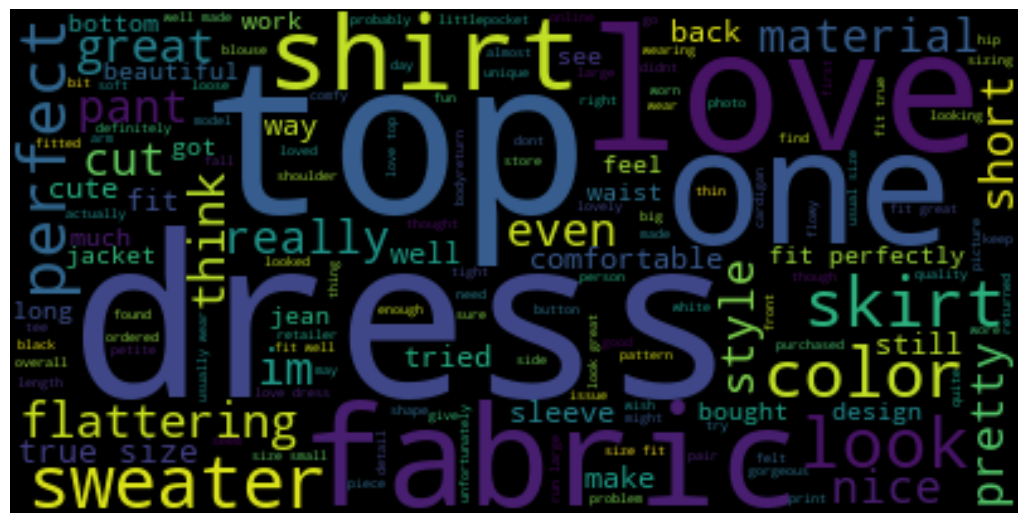

In [168]:
# Word Cloud'u goster
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

**Yorum:** Bu word cloud'a gore yorumlarda one cikan kavramlar; "top", "dress", "love", "one" ve "fabric"tir.

# Sentiment Classification with Machine Learning (Bag of Words and TF-IDF) and Deep Learning & BERT 

## Train Test Split

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X = df["text"]
y= df["recommend"]

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

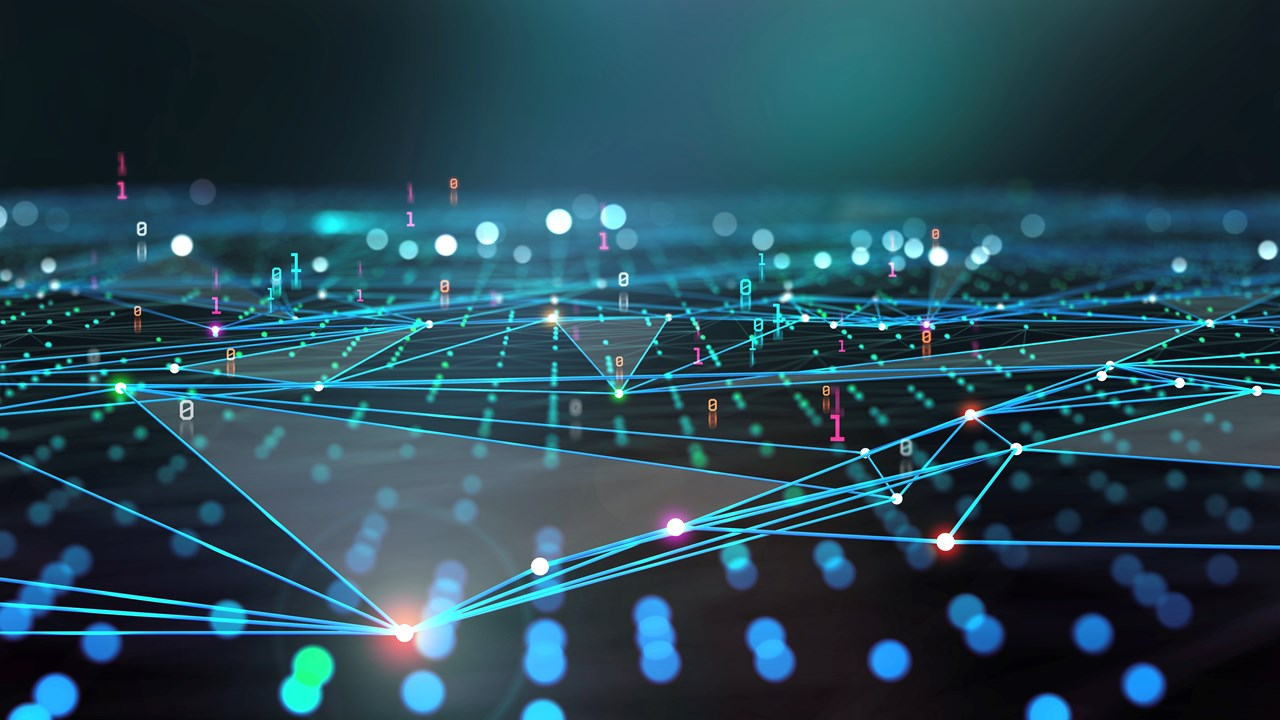

## Vectorization

In [172]:
from sklearn.feature_extraction.text import CountVectorizer     # Bag of Words oluyor.

In [173]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)  # min_df= 3 (Corpus umda 3 ya da daha az olanları ignore et)
X_train_count = vectorizer.fit_transform(X_train)           # ngram_range=(1,2)
X_test_count = vectorizer.transform(X_test)           # max_features=15000 (benim corpusumda en çok kullanılan ilk 15000)

In [174]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [175]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  abstract  \
0       0     0        0        0     0    0         0           0         0   
1       0     0        0        0     0    0         0           0         0   
2       0     0        0        0     0    0         0           0         0   
3       0     0        0        0     0    0         0           0         0   
4       0     0        0        0     0    0         0           0         0   
...    ..   ...      ...      ...   ...  ...       ...         ...       ...   
18097   0     0        0        0     0    0         0           0         0   
18098   0     0        0        0     0    0         0           0         0   
18099   0     0        0        0     0    0         0           0         0   
18100   0     0        0        0     0    0         0           0         0   
18101   0     0        0        0     0    0         0           0         0   

       absurd  abt  abundance  ac  accent  accented  accentuate  accentuated  \
0           0    0          0   0       0         0           0            0   
1           0    0          0   0       0         0           0            0   
2           0    0          0   0       0         0           0            0   
3           0    0          0   0       0         0           0            0   
4           0    0          0   0       0         0           0            0   
...       ...  ...        ...  ..     ...       ...         ...          ...   
18097       0    0          0   0       0         0           0            0   
18098       0    0          0   0       0         0           0            0   
18099       0    0          0   0       0         0           0            0   
18100       0    0          0   0       0         0           0            0   
18101       0    0          0   0       0         0           0            0   

       accentuates  accentuating  acceptable  access  accessorize  \
0                0             0           0       0            0   
1                0             0           0       0            0   
2                0             0           0       0            0   
3                0             0           0       0            0   
4                0             0           0       0            0   
...            ...           ...         ...     ...          ...   
18097            0             0           0       0            0   
18098            0             0           0       0            0   
18099            0             0           0       0            0   
18100            0             0           0       0            0   
18101            0             0           0       0            0   

       accessorized  accessorizing  accessory  accident  accidentally  \
0                 0              0          0         0             0   
1                 0              0          0         0             0   
2                 0              0          0         0             0   
3                 0              0          0         0             0   
4                 0              0          0         0             0   
...             ...            ...        ...       ...           ...   
18097             0              0          0         0             0   
18098             0              0          0         0             0   
18099             0              0          0         0             0   
18100             0              0          0         0             0   
18101             0              0          0         0             0   

       accommodate  accommodates  according  accordingly  account  accurate  \
0                0             0          0            0        0         0   
1                0             0          0            0        0         0   
2                0             0          0            0        0         0   
3                0             0          0            0       

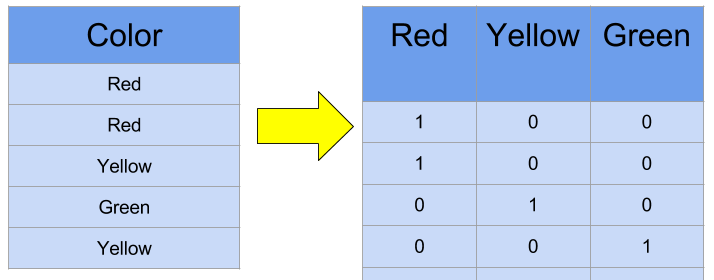

# Models with Vectorization (BoW)

In [176]:
# Eval metriclerin dosyalarini hazirliyoruz

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [177]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    
    print("-----------------------------------")
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train,y_pred_train))
    

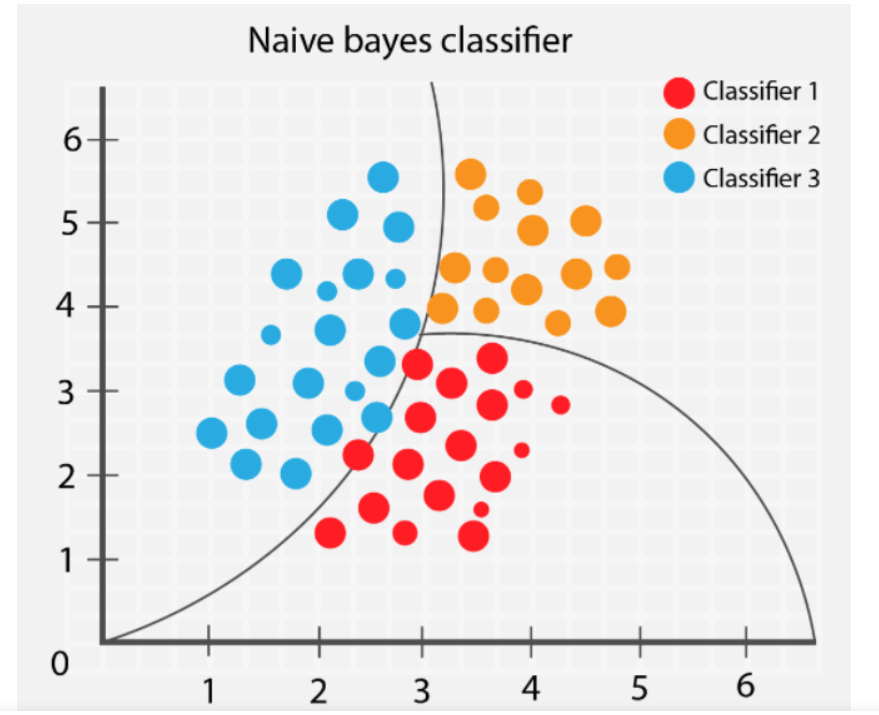

In [178]:
y_train

13198    1
22373    0
1728     0
10425    0
18927    1
        ..
14180    0
9830     0
6752     0
16237    0
16695    0
Name: recommend, Length: 18102, dtype: int64

In [179]:
y_train.unique()

array([1, 0], dtype=int64)

## Naive Bayes

Naive Bayes, doğal dil işleme (NLP) ve metin madenciliği uygulamalarında sıkça kullanılan bir sınıflandırma algoritmasıdır. Temel olarak, Bayes teoremine dayanır ve **özelliklerin birbirinden bağımsız olduğunu varsayar** (bu varsayım "**naive**" yani "**saf**" olarak adlandırılır).

**Algoritma, her bir sınıf için olasılık modeli oluşturur ve yeni veri noktası geldiğinde, olasılık puanlarını hesaplayarak en yüksek olasılığa sahip sınıfı seçer.**

Özellikle **spam e-posta filtreleme**, **duygu analizi** ve **metin kategorizasyonu** gibi alanlarda etkilidir.

**Gaussian** ---> Surekli veriler icin (regresyon analizinde)

**Multinominal**---> Coklu siniflarda classification icin

**Bernolli**---> Ikili siniflarda classification icin

Multinominal  ile Bernolli---> genellikle text verilerini siniflandirmada kullanilir.  

In [180]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [181]:
nb = BernoulliNB() 
nb.fit(X_train_count,y_train)

BernoulliNB()

In [182]:
print("-----------------NB MODEL----------")
eval(nb, X_train_count, X_test_count)

-----------------NB MODEL----------
Test_Set
[[3363  343]
 [ 227  593]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3706
           1       0.63      0.72      0.68       820

    accuracy                           0.87      4526
   macro avg       0.79      0.82      0.80      4526
weighted avg       0.88      0.87      0.88      4526

-----------------------------------
Train_Set
[[13616  1205]
 [  661  2620]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14821
           1       0.68      0.80      0.74      3281

    accuracy                           0.90     18102
   macro avg       0.82      0.86      0.84     18102
weighted avg       0.90      0.90      0.90     18102



In [183]:
#CV yapalim (Benim duzelttigim kod)
# 'negative' etiketini sayısal olarak 1 olarak kabul ediyoruz.
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import BernoulliNB
import pandas as pd

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision-neg': make_scorer(precision_score, pos_label=0),
    'recall-neg': make_scorer(recall_score, pos_label=0),
    'f1-neg': make_scorer(f1_score, pos_label=0)
}

model = BernoulliNB()

# X_train_count ve y_train verilerini sağladığınızı varsayıyorum.
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)

# Sonuçları bir DataFrame'e çevirip ortalamalarını alabiliriz.
df_scores = pd.DataFrame(scores, index=range(1, 11))
print(df_scores.mean()[2:])

test_accuracy         0.875649
test_precision-neg    0.938528
test_recall-neg       0.907630
test_f1-neg           0.922785
dtype: float64


In [184]:
#!pip install yellowbrick

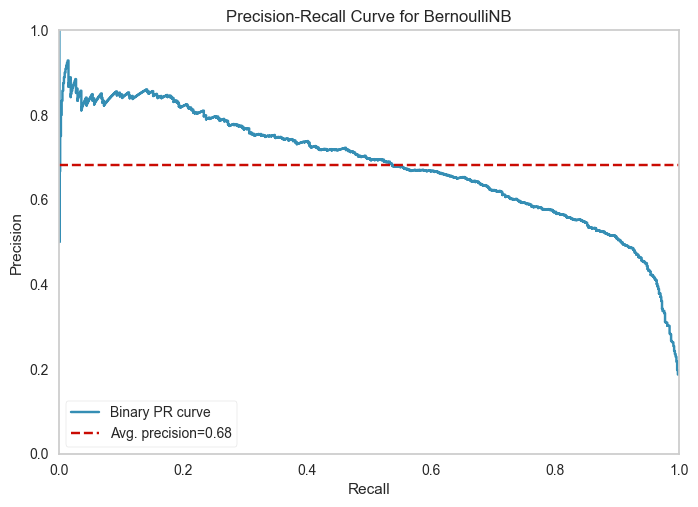

In [185]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    BernoulliNB(alpha=2),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [187]:
# En sonda yapacagimiz karsilastirma icin bu modelin skorlarini kaydediyoruz; nb ---> navie bayes.
# Benim duzenledigim kod;  
model.fit(X_train_count, y_train)
y_pred = model.predict(X_test_count)  # model adını 'nb' yerine 'model' olarak kullandık
nb_count_rec_neg = recall_score(y_test, y_pred)
nb_count_f1_neg = f1_score(y_test, y_pred)
nb_AP = viz.score_  

## Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced' eklenebilir ama o durumda skorlar az dustu.
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [189]:
print("--------------------LOG MODEL-------------")
eval(log, X_train_count, X_test_count)

--------------------LOG MODEL-------------
Test_Set
[[3587  119]
 [ 418  402]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3706
           1       0.77      0.49      0.60       820

    accuracy                           0.88      4526
   macro avg       0.83      0.73      0.76      4526
weighted avg       0.87      0.88      0.87      4526

-----------------------------------
Train_Set
[[14453   368]
 [ 1650  1631]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.93     14821
           1       0.82      0.50      0.62      3281

    accuracy                           0.89     18102
   macro avg       0.86      0.74      0.78     18102
weighted avg       0.88      0.89      0.88     18102



In [190]:
# CV yapalim;

model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.875041
test_precision-neg    0.887819
test_recall-neg       0.970042
test_f1-neg           0.927087
dtype: float64

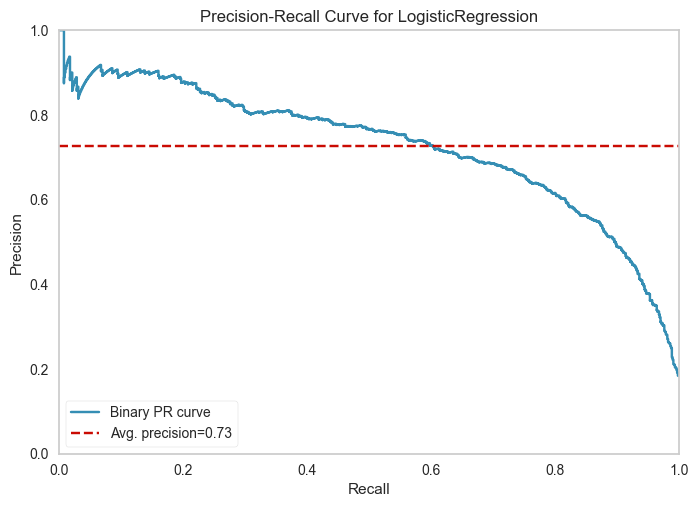

In [191]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [192]:
# sonucu kaydedip, en son karsilastirmada kullanalim;

y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred)
log_count_f1_neg = f1_score(y_test, y_pred)
log_AP = viz.score_

In [193]:
# Balanced yapalim, cunku classlar esit degildi 

log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [194]:
print("-------------LOG MODEL BALANCED-----------")
eval(log, X_train_count, X_test_count)

-------------LOG MODEL BALANCED-----------
Test_Set
[[3188  518]
 [ 127  693]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3706
           1       0.57      0.85      0.68       820

    accuracy                           0.86      4526
   macro avg       0.77      0.85      0.80      4526
weighted avg       0.89      0.86      0.87      4526

-----------------------------------
Train_Set
[[12829  1992]
 [  338  2943]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14821
           1       0.60      0.90      0.72      3281

    accuracy                           0.87     18102
   macro avg       0.79      0.88      0.82     18102
weighted avg       0.91      0.87      0.88     18102



**Yorum:** Balanced yapinca skorlar biraz dustu. 

## SVM

In [195]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count, y_train)

LinearSVC(C=0.01)

In [196]:
print("-----------------SVC MODEL---------------")
eval(svc, X_train_count, X_test_count)

-----------------SVC MODEL---------------
Test_Set
[[3549  157]
 [ 349  471]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3706
           1       0.75      0.57      0.65       820

    accuracy                           0.89      4526
   macro avg       0.83      0.77      0.79      4526
weighted avg       0.88      0.89      0.88      4526

-----------------------------------
Train_Set
[[14434   387]
 [ 1159  2122]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14821
           1       0.85      0.65      0.73      3281

    accuracy                           0.91     18102
   macro avg       0.89      0.81      0.84     18102
weighted avg       0.91      0.91      0.91     18102



In [197]:
#CV yapalim;

model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10) # cv
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.888742
test_precision-neg    0.908168
test_recall-neg       0.961406
test_f1-neg           0.934002
dtype: float64

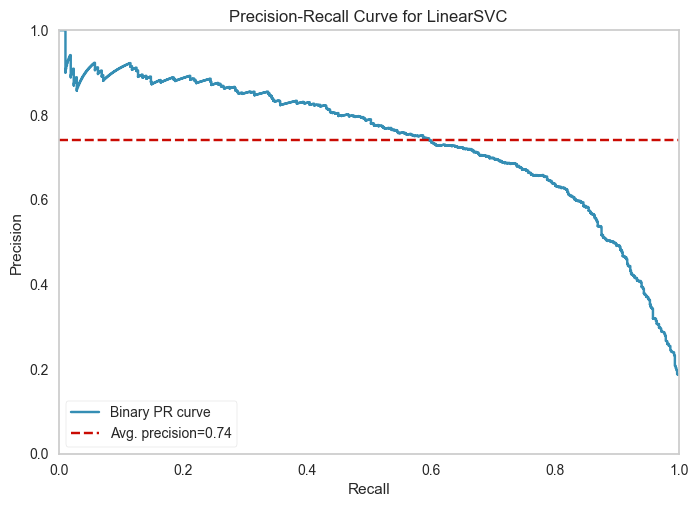

In [198]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [199]:
# Skorlari kaydedip en sonda karsilastirmada kullanalim;

y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred)
svc_count_f1_neg = f1_score(y_test, y_pred)
svc_AP = viz.score_

## KNN

In [200]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

In [201]:
print("--------------KNN MODEL--------")
eval(knn, X_train_count, X_test_count)

--------------KNN MODEL--------
Test_Set
[[3652   54]
 [ 754   66]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      3706
           1       0.55      0.08      0.14       820

    accuracy                           0.82      4526
   macro avg       0.69      0.53      0.52      4526
weighted avg       0.78      0.82      0.76      4526

-----------------------------------
Train_Set
[[14663   158]
 [ 2714   567]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     14821
           1       0.78      0.17      0.28      3281

    accuracy                           0.84     18102
   macro avg       0.81      0.58      0.60     18102
weighted avg       0.83      0.84      0.80     18102



In [202]:
# CV yapalim; 

model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.822174
test_precision-neg    0.831187
test_recall-neg       0.982323
test_f1-neg           0.900455
dtype: float64

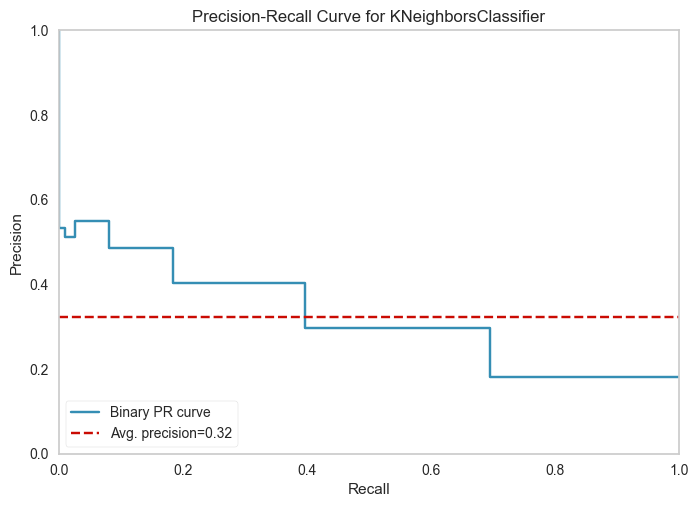

In [203]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=7),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [204]:
# Skorlari yadedelim ki en son karsilastirmada kullanalim;

y_pred = knn.predict(X_test_count)
knn_count_rec_neg = recall_score(y_test, y_pred)
knn_count_f1_neg = f1_score(y_test, y_pred)
knn_AP = viz.score_

## Random Forest

In [205]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

# Burada max_depth 40 olunca overfittinge goturuyor. Azaltinca negatif yorumlari bilme basarisi dusuyor. 

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [206]:
print("-------------RF MODEL------------")
eval(rf, X_train_count, X_test_count)

-------------RF MODEL------------
Test_Set
[[3692   14]
 [ 714  106]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3706
           1       0.88      0.13      0.23       820

    accuracy                           0.84      4526
   macro avg       0.86      0.56      0.57      4526
weighted avg       0.85      0.84      0.79      4526

-----------------------------------
Train_Set
[[14820     1]
 [ 1171  2110]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     14821
           1       1.00      0.64      0.78      3281

    accuracy                           0.94     18102
   macro avg       0.96      0.82      0.87     18102
weighted avg       0.94      0.94      0.93     18102



In [207]:
# CV yapalim;

model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.839079
test_precision-neg    0.837477
test_recall-neg       0.996964
test_f1-neg           0.910280
dtype: float64

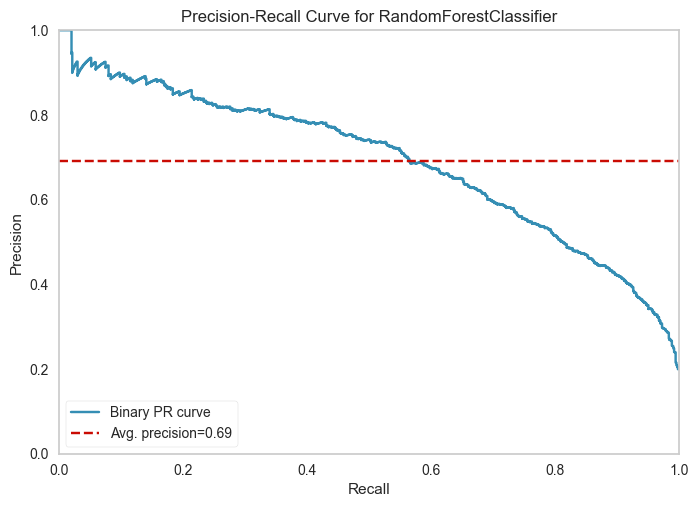

In [208]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [209]:
# Skorlari kaydedip, en son karsilastirmada kullanalim.

y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred)
rf_count_f1_neg = f1_score(y_test, y_pred)
rf_AP = viz.score_

In [210]:
# Balance yapalim;

rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [211]:
print("-------------------RF MODEL BALANCED----------")
eval(rf, X_train_count, X_test_count)

-------------------RF MODEL BALANCED----------
Test_Set
[[3536  170]
 [ 384  436]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      3706
           1       0.72      0.53      0.61       820

    accuracy                           0.88      4526
   macro avg       0.81      0.74      0.77      4526
weighted avg       0.87      0.88      0.87      4526

-----------------------------------
Train_Set
[[14629   192]
 [   81  3200]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14821
           1       0.94      0.98      0.96      3281

    accuracy                           0.98     18102
   macro avg       0.97      0.98      0.97     18102
weighted avg       0.99      0.98      0.99     18102



**Yorum:**  **Datalar balanced yapilinca Random Forest yonteminde skorlar iyilesti.** 

## Ada Boost

In [212]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [213]:
print("---------------------Ada MODEL--------------")
eval(ada, X_train_count, X_test_count)

---------------------Ada MODEL--------------
Test_Set
[[3493  213]
 [ 363  457]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3706
           1       0.68      0.56      0.61       820

    accuracy                           0.87      4526
   macro avg       0.79      0.75      0.77      4526
weighted avg       0.87      0.87      0.87      4526

-----------------------------------
Train_Set
[[14259   562]
 [ 1126  2155]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     14821
           1       0.79      0.66      0.72      3281

    accuracy                           0.91     18102
   macro avg       0.86      0.81      0.83     18102
weighted avg       0.90      0.91      0.90     18102



In [214]:
# CV yapalim;

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.877748
test_precision-neg    0.909094
test_recall-neg       0.945280
test_f1-neg           0.926812
dtype: float64

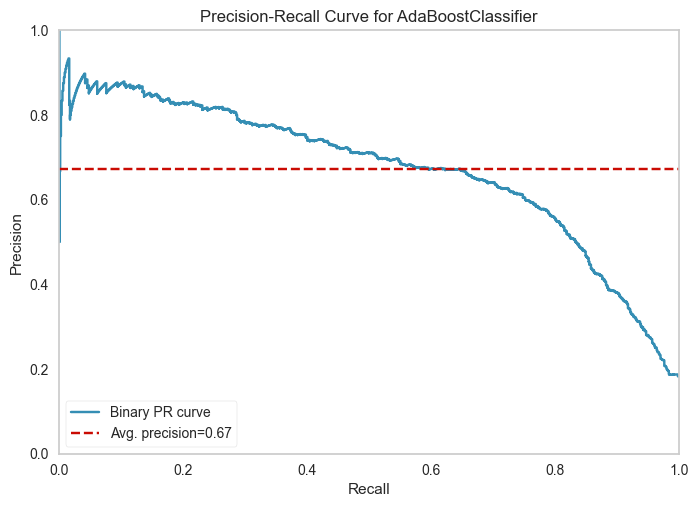

In [215]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [216]:
# Skorlari kaydedelim, sondaki karsilastirmada kullanalim;

y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred)
ada_count_f1_neg = f1_score(y_test, y_pred)
ada_AP = viz.score_

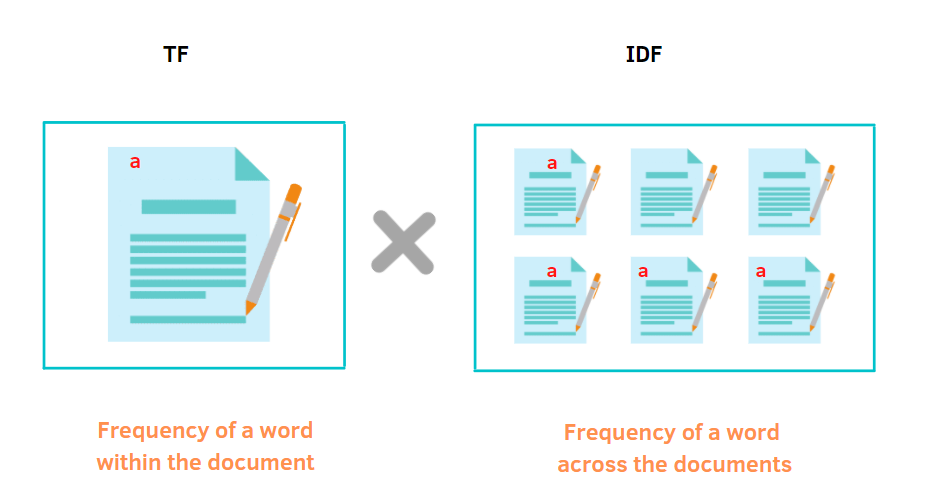

# Models with TF-IDF Vectorization

**Yukarida BoW ile calismistik, burada TF-IDF ile calisalim.**

TF-IDF bir kelimenin **corpusta** kac defa gectigini gosteriyor. 

BoW  bir kelimenin bir satirda kac defa gectigini gosteriyordu.

In [217]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [218]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [220]:
# TfidfVectorizer'ı pickle ile kaydetme
import pickle
with open('tf_idf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tf_idf_vectorizer, f)

In [221]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [222]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  abstract  \
0      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
1      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
2      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
3      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
4      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
...    ...   ...      ...      ...   ...  ...       ...         ...       ...   
18097  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
18098  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
18099  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
18100  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   
18101  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0       0.0   

       absurd  abt  abundance   ac  accent  accented  accentuate  accentuated  \
0         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
1         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
2         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
3         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
4         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
...       ...  ...        ...  ...     ...       ...         ...          ...   
18097     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18098     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18099     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18100     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18101     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   

       accentuates  accentuating  acceptable  access  accessorize  \
0              0.0           0.0         0.0     0.0          0.0   
1              0.0           0.0         0.0     0.0          0.0   
2              0.0           0.0         0.0     0.0          0.0   
3              0.0           0.0         0.0     0.0          0.0   
4              0.0           0.0         0.0     0.0          0.0   
...            ...           ...         ...     ...          ...   
18097          0.0           0.0         0.0     0.0          0.0   
18098          0.0           0.0         0.0     0.0          0.0   
18099          0.0           0.0         0.0     0.0          0.0   
18100          0.0           0.0         0.0     0.0          0.0   
18101          0.0           0.0         0.0     0.0          0.0   

       accessorized  accessorizing  accessory  accident  accidentally  \
0               0.0            0.0        0.0       0.0           0.0   
1               0.0            0.0        0.0       0.0           0.0   
2               0.0            0.0        0.0       0.0           0.0   
3               0.0            0.0        0.0       0.0           0.0   
4               0.0            0.0        0.0       0.0           0.0   
...             ...            ...        ...       ...           ...   
18097           0.0            0.0        0.0       0.0           0.0   
18098           0.0            0.0        0.0       0.0           0.0   
18099           0.0            0.0        0.0       0.0           0.0   
18100           0.0            0.0        0.0       0.0           0.0   
18101           0.0            0.0        0.0       0.0           0.0   

       accommodate  accommodates  according  accordingly  account  accurate  \
0              0.0           0.0        0.0          0.0      0.0       0.0   
1              0.0           0.0        0.0          0.0      0.0       0.0   
2              0.0           0.0        0.0          0.0      0.0       0.0   
3              0.0           0.0        

## Naive Bayes

In [223]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = BernoulliNB()
nb.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [224]:
print("--------------------NB MODEL-----------------")
eval(nb, X_train_tf_idf, X_test_tf_idf)

--------------------NB MODEL-----------------
Test_Set
[[3363  343]
 [ 227  593]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3706
           1       0.63      0.72      0.68       820

    accuracy                           0.87      4526
   macro avg       0.79      0.82      0.80      4526
weighted avg       0.88      0.87      0.88      4526

-----------------------------------
Train_Set
[[13616  1205]
 [  661  2620]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14821
           1       0.68      0.80      0.74      3281

    accuracy                           0.90     18102
   macro avg       0.82      0.86      0.84     18102
weighted avg       0.90      0.90      0.90     18102



In [225]:
# CV yapalim;

model = BernoulliNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.875649
test_precision-neg    0.938528
test_recall-neg       0.907630
test_f1-neg           0.922785
dtype: float64

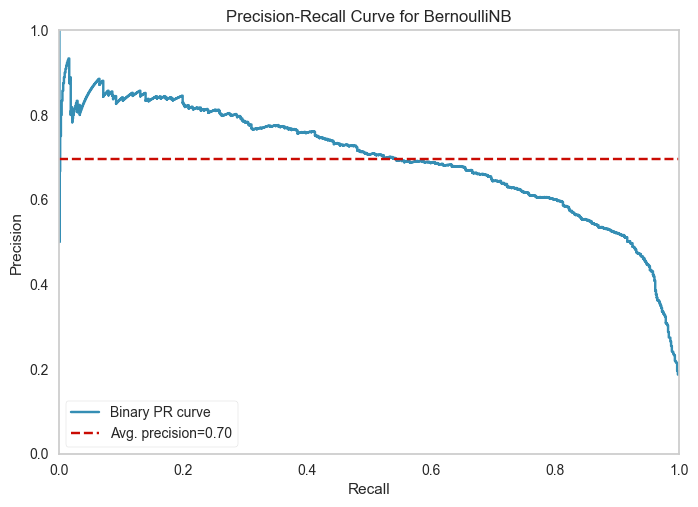

In [226]:
viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [227]:
# Skorlari kaydedelim ve en sonda karsilastirmada kullanalim;

y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred)
nb_tfidf_f1_neg = f1_score(y_test, y_pred)
nb_tfidf_AP = viz.score_

In [229]:
with open('1.NaiveBayes.pkl', 'wb') as f:
    pickle.dump(nb, f)

## Logistic Regression

In [231]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [232]:
print("-------------------------LOG MODEL--------------------")
eval(log, X_train_tf_idf, X_test_tf_idf)

-------------------------LOG MODEL--------------------
Test_Set
[[3609   97]
 [ 445  375]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3706
           1       0.79      0.46      0.58       820

    accuracy                           0.88      4526
   macro avg       0.84      0.72      0.76      4526
weighted avg       0.87      0.88      0.87      4526

-----------------------------------
Train_Set
[[14554   267]
 [ 1726  1555]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     14821
           1       0.85      0.47      0.61      3281

    accuracy                           0.89     18102
   macro avg       0.87      0.73      0.77     18102
weighted avg       0.89      0.89      0.88     18102



In [233]:
# CV yapiyoruz;

model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.875262
test_precision-neg    0.881496
test_recall-neg       0.979354
test_f1-neg           0.927840
dtype: float64

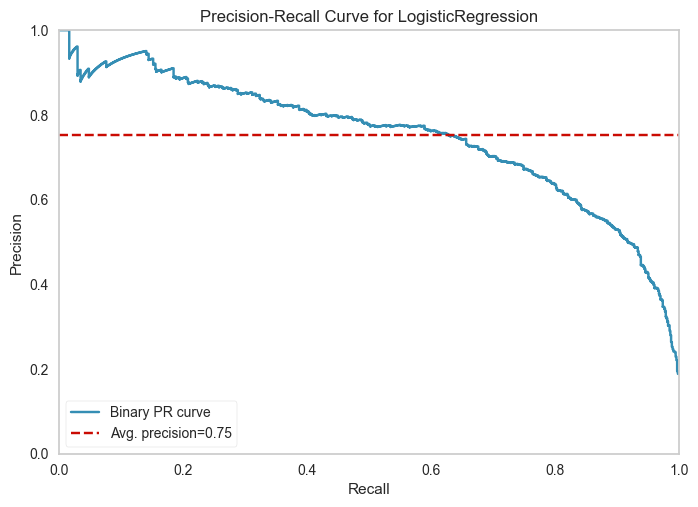

In [234]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [235]:
# Skorlari kaydedelim ve en sonda karsilastirmada kullanalim;

y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred)
log_tfidf_f1_neg = f1_score(y_test, y_pred)
log_tfidf_AP = viz.score_

In [252]:
with open('2.LogisticRegression.pkl', 'wb') as f:
    pickle.dump(log, f)

In [237]:
# Balanced yaparak calislaim;

log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [238]:
print("---------------------LOG MODEL BALANCED------------------")
eval(log, X_train_tf_idf, X_test_tf_idf)

---------------------LOG MODEL BALANCED------------------
Test_Set
[[3208  498]
 [ 123  697]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3706
           1       0.58      0.85      0.69       820

    accuracy                           0.86      4526
   macro avg       0.77      0.86      0.80      4526
weighted avg       0.89      0.86      0.87      4526

-----------------------------------
Train_Set
[[12903  1918]
 [  278  3003]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14821
           1       0.61      0.92      0.73      3281

    accuracy                           0.88     18102
   macro avg       0.79      0.89      0.83     18102
weighted avg       0.91      0.88      0.89     18102



**Bu kez Logiatic Regression da balanced yapinca skorlar dustu.  O yuzden ben ilk halini kaydettim.**

## SVM

In [239]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.1)

In [240]:
print("-------------------------SVC MODEL--------------------")
eval(svc, X_train_tf_idf, X_test_tf_idf)

-------------------------SVC MODEL--------------------
Test_Set
[[3590  116]
 [ 382  438]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3706
           1       0.79      0.53      0.64       820

    accuracy                           0.89      4526
   macro avg       0.85      0.75      0.79      4526
weighted avg       0.88      0.89      0.88      4526

-----------------------------------
Train_Set
[[14491   330]
 [ 1289  1992]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14821
           1       0.86      0.61      0.71      3281

    accuracy                           0.91     18102
   macro avg       0.89      0.79      0.83     18102
weighted avg       0.91      0.91      0.90     18102



In [241]:
# CV yapalim;

model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.887416
test_precision-neg    0.900037
test_recall-neg       0.970312
test_f1-neg           0.933839
dtype: float64

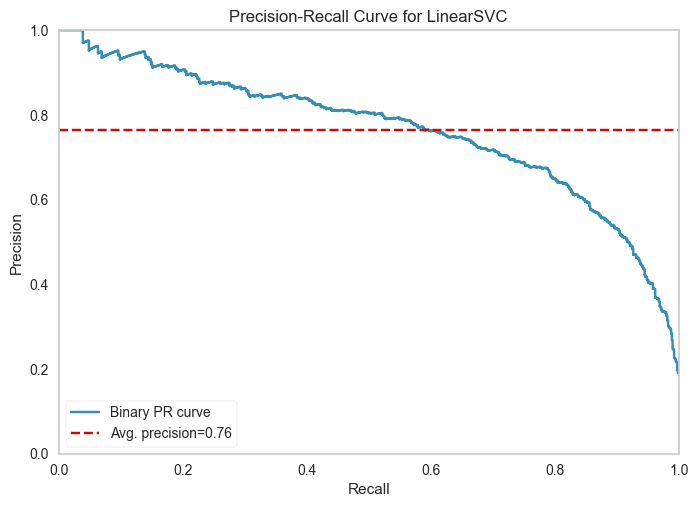

In [242]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [243]:
# Skorlari kaydedelim ve en sonda karsilastirmada kullanalim;

y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred)
svc_tfidf_f1_neg = f1_score(y_test, y_pred)
svc_tfidf_AP = viz.score_

In [251]:
with open('3.SupportVectorClassification.pkl', 'wb') as f:
    pickle.dump(svc, f)

## KNN

In [245]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=7)

In [246]:
print("-----------------------KNN MODEL---------------")
eval(knn, X_train_tf_idf, X_test_tf_idf)

-----------------------KNN MODEL---------------
Test_Set
[[3600  106]
 [ 589  231]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3706
           1       0.69      0.28      0.40       820

    accuracy                           0.85      4526
   macro avg       0.77      0.63      0.66      4526
weighted avg       0.83      0.85      0.82      4526

-----------------------------------
Train_Set
[[14603   218]
 [ 1974  1307]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     14821
           1       0.86      0.40      0.54      3281

    accuracy                           0.88     18102
   macro avg       0.87      0.69      0.74     18102
weighted avg       0.88      0.88      0.86     18102



In [247]:
# CV yapalim;

model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.849077
test_precision-neg    0.858810
test_recall-neg       0.976182
test_f1-neg           0.913733
dtype: float64

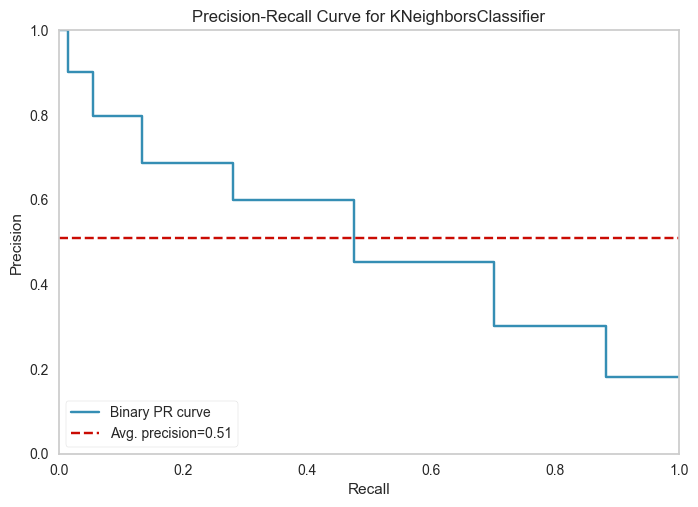

In [248]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=7),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [249]:
# Skorlari kaydedelim ve en sonda karsilastirmada kullanalim;

y_pred = knn.predict(X_test_tf_idf)
knn_tfidf_rec_neg = recall_score(y_test, y_pred)
knn_tfidf_f1_neg = f1_score(y_test, y_pred)
knn_tfidf_AP = viz.score_
knn_tfidf_AP

0.5100932529076107

In [250]:
with open('4.KNN.pkl', 'wb') as f:
    pickle.dump(knn, f)

## RandomForest

In [253]:
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [254]:
print("------------------------RF MODEL-----------------")
eval(rf, X_train_tf_idf, X_test_tf_idf)

------------------------RF MODEL-----------------
Test_Set
[[3693   13]
 [ 720  100]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3706
           1       0.88      0.12      0.21       820

    accuracy                           0.84      4526
   macro avg       0.86      0.56      0.56      4526
weighted avg       0.85      0.84      0.78      4526

-----------------------------------
Train_Set
[[14821     0]
 [ 1249  2032]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14821
           1       1.00      0.62      0.76      3281

    accuracy                           0.93     18102
   macro avg       0.96      0.81      0.86     18102
weighted avg       0.94      0.93      0.92     18102



In [255]:
# CV yapalim

model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.838195
test_precision-neg    0.836749
test_recall-neg       0.996897
test_f1-neg           0.909824
dtype: float64

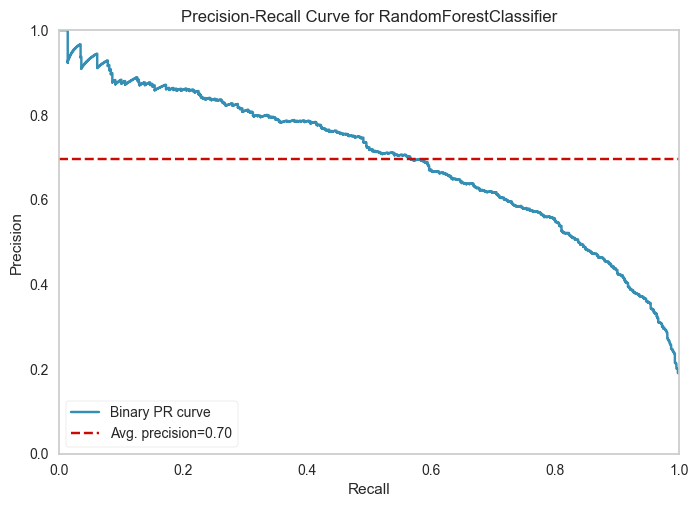

In [256]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [257]:
# Skorlari kaydedelim ve en sonda karsilastirmada kullanalim;

y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred)
rf_tfidf_f1_neg = f1_score(y_test, y_pred)
rf_tfidf_AP = viz.score_
rf_tfidf_AP

0.6955856167162322

In [258]:
# Balanced yaparak calisalim;

rf = RandomForestClassifier(100, max_depth=15, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [259]:
print("-------------------------RF MODEL BALANCED-----------------")
eval(rf, X_train_tf_idf, X_test_tf_idf)

-------------------------RF MODEL BALANCED-----------------
Test_Set
[[3221  485]
 [ 198  622]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3706
           1       0.56      0.76      0.65       820

    accuracy                           0.85      4526
   macro avg       0.75      0.81      0.77      4526
weighted avg       0.87      0.85      0.86      4526

-----------------------------------
Train_Set
[[13373  1448]
 [  266  3015]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     14821
           1       0.68      0.92      0.78      3281

    accuracy                           0.91     18102
   macro avg       0.83      0.91      0.86     18102
weighted avg       0.93      0.91      0.91     18102



**RF balanced de train skoru dusse de teste ait skor yukselmis. Ayrica f1 skoru da balanced modelde belirgin bicimde iyilesmis durumda. Bu nedenle balanced modeli kaydediyorum.** 

In [260]:
with open('5.RandomForest.pkl', 'wb') as f:
    pickle.dump(rf, f)

## Ada Boost

In [261]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [262]:
print("--------------------------Ada MODEL------------------------")
eval(ada, X_train_tf_idf, X_test_tf_idf)

--------------------------Ada MODEL------------------------
Test_Set
[[3490  216]
 [ 343  477]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3706
           1       0.69      0.58      0.63       820

    accuracy                           0.88      4526
   macro avg       0.80      0.76      0.78      4526
weighted avg       0.87      0.88      0.87      4526

-----------------------------------
Train_Set
[[14318   503]
 [  954  2327]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14821
           1       0.82      0.71      0.76      3281

    accuracy                           0.92     18102
   macro avg       0.88      0.84      0.86     18102
weighted avg       0.92      0.92      0.92     18102



In [263]:
# CV yapalim;

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.873053
test_precision-neg    0.906690
test_recall-neg       0.941974
test_f1-neg           0.923966
dtype: float64

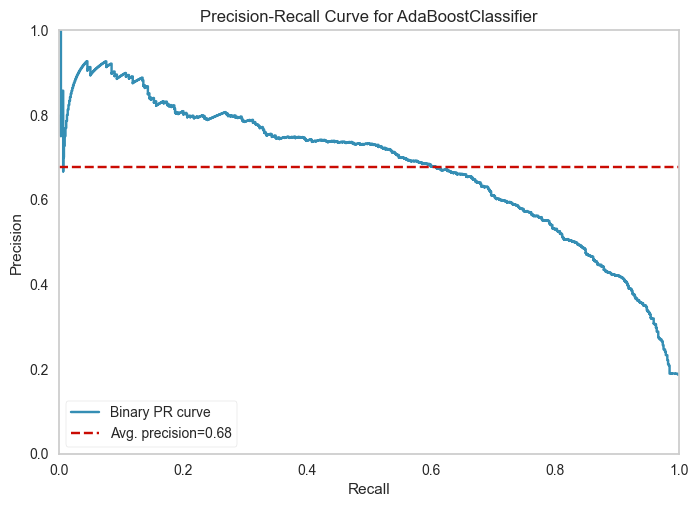

In [264]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [265]:
# Skorlari kaydedelim ve en sonda karsilastirmada kullanalim;

y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred)
ada_tfidf_f1_neg = f1_score(y_test, y_pred)
ada_tfidf_AP = viz.score_
ada_tfidf_AP

0.6763176455485637

In [266]:
with open('6.AdaBoost.pkl', 'wb') as f:
    pickle.dump(ada, f)

# Compare Scoring

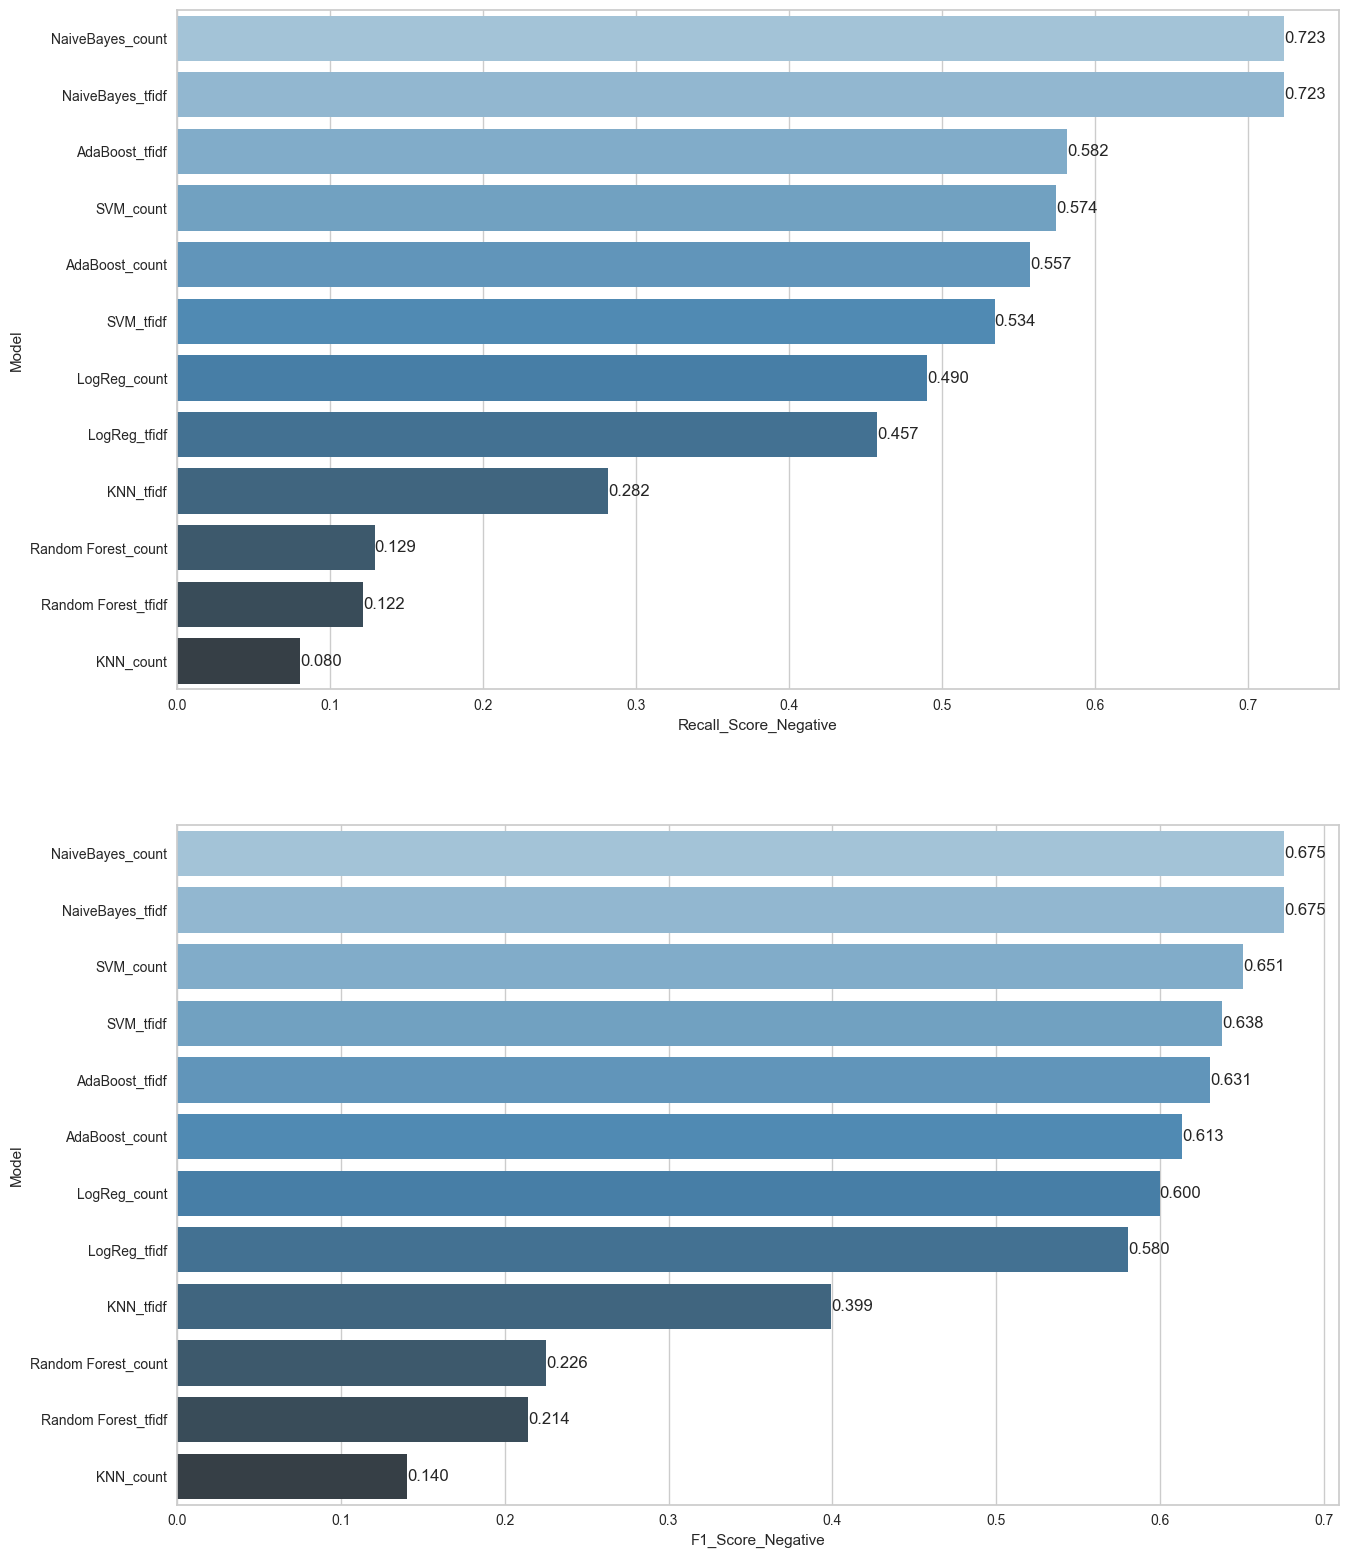

In [267]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],
                        
                        "F1_Score_Negative": [nb_count_f1_neg, log_count_f1_neg, svc_count_f1_neg, knn_count_f1_neg,
                                             rf_count_f1_neg, ada_count_f1_neg, nb_tfidf_f1_neg, log_tfidf_f1_neg,
                                             svc_tfidf_f1_neg, knn_tfidf_f1_neg, rf_tfidf_f1_neg, ada_tfidf_f1_neg],
                        
                        "Recall_Score_Negative": [nb_count_rec_neg, log_count_rec_neg, svc_count_rec_neg, 
                                                  knn_count_rec_neg, rf_count_rec_neg, ada_count_rec_neg, 
                                                  nb_tfidf_rec_neg, log_tfidf_rec_neg, svc_tfidf_rec_neg, 
                                                  knn_tfidf_rec_neg, rf_tfidf_rec_neg, ada_tfidf_rec_neg]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

Bag of Words; her satirdaki kelimelere odaklaniyor sadece.

TF-IDF ise hem her bir satirdaki kelime sayisina, hem de tum corousta (kitapta) o kelimelerin gecme sayisina bakarak karar veriyor. 

Bu nedenle TF-IDF ile yapilan ML moodelleri, BoW ile yapilan ML lerden daha iyi sonuc veriyor. 

# Prediction

## For New Reviews, Prediction with Pipeline


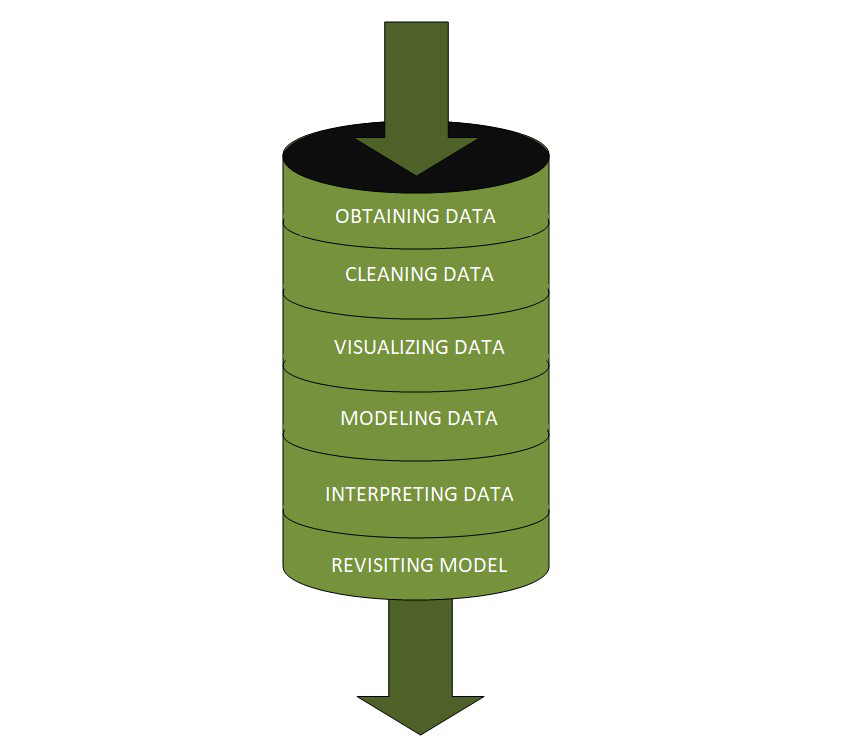

In [270]:
from sklearn.pipeline import Pipeline

Bu kod, scikit-learn kütüphanesini kullanarak bir veri işleme ve sınıflandırma boru hattı (pipeline) oluşturur. Boru hattı, metin madenciliği veya metin sınıflandırma gibi uygulamalarda yaygın olarak kullanılır. Boru hattı, veri işleme ve modelleme adımlarını birleştirir ve kolayca tekrar kullanılabilir hale getirir.

Bu özel boru hattı (Pipeline) iki temel adıma sahiptir:

TfidfVectorizer: Metin belgelerini TF-IDF (Term Frequency-Inverse Document Frequency) vektörlerine dönüştüren bir vektörleştirici. preprocessor=cleaning ile metin verilerine önişleme yapılmasını sağlar ve min_df=3 ile en az 3 belgede geçen terimleri kullanır.

LogisticRegression: Sınıflandırma modeli olarak lojistik regresyon kullanır. C=0.4 ile ceza terimi (regülarizasyon parametresi) ayarlanmış ve max_iter=1000 ile maksimum iterasyon sayısı sınırlanmıştır.


In [271]:
pipe = Pipeline([('tfidf',TfidfVectorizer(preprocessor=cleaning, min_df=3)),('log',LogisticRegression(C=0.4, max_iter=1000))])

In [273]:
pipe = Pipeline([('tfidf',TfidfVectorizer(preprocessor=cleaning, min_df=3)),('log', load('2.LogisticRegression.pkl'))])


Bu kod, Pipeline sınıfını kullanarak bir veri işleme ve modelleme boru hattı oluşturur. Pipeline, bir dizi adımdan oluşan bir boru hattıdır ve her adım sırasıyla veriyi dönüştürür veya modele uygular.

Bu belirli boru hattı iki adımdan oluşur:

TfidfVectorizer: Metin verilerini sayısal vektörlere dönüştürmek için kullanılan bir vektörleştirici (özellik çıkarma) adımıdır. TfidfVectorizer sınıfı, metinleri TF-IDF (Terim Frekansı-Terim Ters Belge Frekansı) değerlerine dönüştürür. preprocessor=cleaning parametresi, metin verilerinin önişleme işlemleri için cleaning adlı bir önişleme işlevini belirtir. min_df=3 parametresi, en az 3 belgede geçen terimlerin kullanılmasını sağlar.

LogisticRegression: Sınıflandırma modelini temsil eder. Burada LogisticRegression sınıfı kullanılarak bir lojistik regresyon modeli oluşturulur. C=0.4 parametresi, lojistik regresyon modelinin C parametresini belirtir.  C parametresi, düzenlileştirme (regulaziation) teriminin (lambda) tersini belirtir (C=1/lambda). C değeri ne kadar büyükse, model o kadar az düzenlenir, boyle durumlar modelin verilere daha fazla uyum sağlamasına yol açar. Ancak, overfitting riski artar; C değeri ne kadar küçükse, model o kadar fazla düzenlenir. Yüksek düzenlileştirme, modelin genelleme yeteneğini artırır, fakat underfitting riski artar. 'C' parametresinin optimum değeri çapraz doğrulama ile belirlenebilir.

max_iter=1000 parametresi, maksimum iterasyon sayısını belirtir.

Bu pipline, metin verilerini TF-IDF değerlerine dönüştürdükten sonra bu değerleri kullanarak lojistik regresyon modelini eğitir.

max_iter=1000, lojistik regresyon modelinin maksimum iterasyon sayısını belirten bir parametredir. Iterasyonlar, modelin eğitim verilerine uyum sağlamak için tekrarlanan güncelleme adımlarını ifade eder. Lojistik regresyon modeli, maksimum iterasyon sayısına ulaştığında veya yakınsama kriterine göre durduğunda eğitim sürecini sonlandırır.

Bu parametre, modelin ne kadar süre boyunca eğitim yapacağını kontrol etmek için kullanılır. Özellikle büyük veri kümeleri veya karmaşık modellerde, eğitim süreci daha fazla iterasyon gerektirebilir. max_iter değeri, eğitim süresini uzatmak veya kısaltmak için ayarlanabilir. 1000, belirli bir sayıda iterasyon yapılacağını ve ardından eğitimin sonlandırılacağını göstermektedir.

In [274]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=3,
                                 preprocessor=<function cleaning at 0x000001FEA1BA0790>)),
                ('log',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    max_iter=1000))])

Bu kod, pipe adlı boru hattını veriye uyum sağlamak için kullanır. fit işlemi, boru hattındaki her bir adımı sırayla çalıştırarak veriyi dönüştürür ve modele uygular.

X veri kümesi, eğitim verilerini temsil eder. Bu veriler, metinlerin özellik vektörlerini içermelidir. Önceki adımda belirtildiği gibi, TfidfVectorizer adımı metinleri TF-IDF değerlerine dönüştürür.

y veri kümesi ise ilgili etiketleri içerir. Bu, sınıflandırma probleminde metin örneklerine karşılık gelen doğru sınıf etiketlerini içermelidir.

Bu kod, boru hattını eğitim verilerine uyum sağlamak için kullanılır. Bu işlem, TfidfVectorizer adımını kullanarak metinleri sayısal vektörlere dönüştürür ve ardından LogisticRegression adımında lojistik regresyon modelini eğitir. Model, metinlerin özelliklerini ve ilgili etiketleri kullanarak bir sınıflandırma modeli oluşturur.

In [275]:
# New review 1

review = "The fit is perfect and the material feels luxurious. A must-have for any wardrobe"
review = pd.Series(review)
pipe.predict(review)

array([0], dtype=int64)

In [276]:
# New review 2

review = "Love the floral print and the light fabric, but it runs a bit long"
review = pd.Series(review)
pipe.predict(review)

array([0], dtype=int64)

In [277]:
# New review 3

review = "The color faded after just one wash. Not what I expected for the price"
review = pd.Series(review)
pipe.predict(review)

array([1], dtype=int64)

In [278]:
# New review 4

review = "The fabric is breathable and it looks very professional. Pairs well with a blazer"
review = pd.Series(review)
pipe.predict(review)

array([0], dtype=int64)

In [279]:
# New review 5

review = "Comfortable, but the material is a bit too thin for my liking"
review = pd.Series(review)
pipe.predict(review)

array([0], dtype=int64)

In [280]:
# New review 6

review = "Keeps me warm and looks stylish, but the zipper gets stuck sometimes"
review = pd.Series(review)
pipe.predict(review)

array([0], dtype=int64)

In [281]:
# New review 7

review = "These shoes are gorgeous but incredibly uncomfortable. Couldn't wear them for more than an hour"
review = pd.Series(review)
pipe.predict(review)

array([1], dtype=int64)

# DEEP LEARNING MODEL

Deep Learning anaizleri kendi icinde 2'ye ayrilir. Manuel DL ve Pre-Trained DL seklinde. Bu calismada ikisi de kullanilmistir.  

Burada TF-IDF yontemiyle vektorize edilmis veriler kullanilmistir. 

ML asamasinda  bu sekilde calisilmisti:

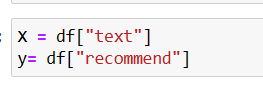

Ama DL de bunu degistirmek gerekiyor. Bu nedenle once veriler DL'ye uygun hale getirildi, sonra DL yapildi.

## Preprocessing

In [165]:
# Eger direk bu yontemi kullanacaksan datayi burada okutup, devaindaki islemleri yapabilirsin. 

### Read the Original Data

In [305]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### Select the Necessary Columns

In [306]:
# Analizde kullanacagimiz sutunlari cekelim;
df=df[["Review Text", "Recommended IND"]]
df

Review Text  Recommended IND
0      Absolutely wonderful - silky and sexy and comf...                1
1      Love this dress!  it's sooo pretty.  i happene...                1
2      I had such high hopes for this dress and reall...                0
3      I love, love, love this jumpsuit. it's fun, fl...                1
4      This shirt is very flattering to all due to th...                1
...                                                  ...              ...
23481  I was very happy to snag this dress at such a ...                1
23482  It reminds me of maternity clothes. soft, stre...                1
23483  This fit well, but the top was very see throug...                0
23484  I bought this dress for a wedding i have this ...                1
23485  This dress in a lovely platinum is feminine an...                1

[23486 rows x 2 columns]

### Change the Columns Name

In [307]:
# Sutun adlarini degistirelim; 
df.rename(columns={'Review Text': 'text', 'Recommended IND': 'recommend'}, inplace=True)
df

text  recommend
0      Absolutely wonderful - silky and sexy and comf...          1
1      Love this dress!  it's sooo pretty.  i happene...          1
2      I had such high hopes for this dress and reall...          0
3      I love, love, love this jumpsuit. it's fun, fl...          1
4      This shirt is very flattering to all due to th...          1
...                                                  ...        ...
23481  I was very happy to snag this dress at such a ...          1
23482  It reminds me of maternity clothes. soft, stre...          1
23483  This fit well, but the top was very see throug...          0
23484  I bought this dress for a wedding i have this ...          1
23485  This dress in a lovely platinum is feminine an...          1

[23486 rows x 2 columns]

### Is Data Balanced?

In [308]:
df.recommend.value_counts()# Bu bir sentiment anaiz. 1;ler ozitif, 0'lar negatifi gosteriyor.

1    19314
0     4172
Name: recommend, dtype: int64

**Burada 1 olumlu iken 0 olumsuz yorumları ifade etmektedir. Hedef Label ın 1 olması daha doğru bir yaklaşımdır. Model.fit olarak çalışmaya başladığı zaman Val_recal ve recall değerleri her zaman 1 i takip ederler.**

### Make Target Variables (Negatives) 1 

In [309]:
# Hedef yorumlari 1 yapalim;
df.recommend = df.recommend.map({1:0, 0:1}) # Biz problemli olanlari incelemk istedigimiz icin negatif yorumlari (0)  1 yaptik.

In [310]:
df.recommend.value_counts()

0    19314
1     4172
Name: recommend, dtype: int64

**Hedef (olumsuz) yourmlar 1 oldu.** 

### Check and Handle Null Values

In [311]:
# Null degerleri kontrol edelim;
df. isnull().sum()

text         845
recommend      0
dtype: int64

In [312]:
# Review Text  sutununda bos olan (yorum bulunmayan) satirlari siellim;

df.dropna(subset=["text"], inplace=True)

In [313]:
df. isnull().sum()

text         0
recommend    0
dtype: int64

**Veriler analize hazir.**

## Tokenization

In [314]:
X = df['text'].values         # Deep Learning de datayı arraya çevirmek için ".values" ekliyoruz. DL de bu HIZ ICIN gerekli.
y = df['recommend'].values

**Soru:** 
X = df['text'].values         
y = df['recommend'].values

Bu sekilde sonlarina  .values yazmak ne kazandiriyor diye ChatGPT'ye sordum.

**Cevap:** .values özniteliği, bir **Pandas DataFrame veya Series'ten NumPy dizisine dönüşüm sağlar**. Yani df['text'].values ve df['recommend'].values ifadeleri, ilgili kolonların değerlerini NumPy dizisi olarak döndürür.

**Avantajları:**

**Hız*:** NumPy dizileri, genellikle Pandas DataFrame'lerine göre daha hızlı işlem yapabilir çünkü düşük seviyede ve daha optimize edilmiş bir yapıya sahiptirler.

**Uyumluluk:** Birçok makine öğrenimi kütüphanesi, girdi olarak NumPy dizilerini kabul eder. Scikit-learn gibi kütüphaneler için bu bir gereklilik olabilir.

**Bellek Kullanımı:** NumPy, bellek kullanımını optimize eder, bu da büyük veri setleriyle çalışırken avantajlı olabilir.

In [288]:
X[0]

'Absolutely wonderful - silky and sexy and comfortable'

Bu şekilde, DataFrame verileri NumPy array'ine dönüştürülerek, derin öğrenme modeline giriş olarak kullanılabilir.

In [315]:
num_words= 15000   # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. Coprusta en fazla gecen 15-20 bin tokei=nin lainmasi genelde kabul goren miktarlar.

### Tokenizer ile Text Cleaning

In [316]:
#"tokinizer"; buyuk harfleri kucuge donusturur, filtersde verdigimiz sembollerden arindirir, bosluklardan token token ayirir.

from tensorflow.keras.preprocessing.text import Tokenizer    # Tensorflow un Tokenizer fonksiyonunu cagiralim;

tokenizer = Tokenizer(num_words=num_words, filters='!#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789')
# filters'in defaultunda rakamlar yok, onalri da ekleyerek verdik ki rakammlari da silsin

In [317]:
tokenizer.fit_on_texts(X)     # Tensorflow un kendisinin geliştirdiği Tokenizer fonksiyonu... #otomatik olarak lower yapıyor.. clean yapiyor.

**tokenizer.fit_on_texts(X):**

Bu işlem, verilen metin verisi (X) üzerinden çalışır ve Tokenizer'ın içsel sözcük indekslerini oluşturur. Her kelimenin bir sayı ile eşleştirildiği bir sözlük oluşturur. Bu sözlük, metindeki her benzersiz kelimenin sayısal bir indeksi ile ilişkilendirilmesini sağlar. Bu işlem, Tokenizer'ın metindeki kelimeleri sayısal dizilere dönüştürmek için hangi indeksleri kullanacağını belirler. Genellikle, eğitim verisi üzerinde yapılır ve eğitim verisi içindeki tüm benzersiz kelimelerin Tokenizer tarafından tanınmasını sağlar.

**Deep learning de lemmatization ve stemming yapılmıyor !  Model o kadar guclu ki bunlara gerek kalmiyor.**

## Creating Word Index

In [384]:
tokenizer.word_index # en cok gecen kelimeden baslayip siralama yapiyor. En fazla gecen "cok" kelimesi imis. 1 ayni zamanda "cok" kelimesinin agirligi (sayisal karsiligi) oluyor.

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 "'": 48,
 'look': 49,
 'if': 50,
 'more': 51,
 'really': 52,
 'ordered': 53,
 'little': 54,
 'perfect': 55,
 '"': 56,
 'will': 57,
 'these': 58,
 'one': 59,
 'flattering': 60,
 'well': 61,
 'an': 62,
 'soft': 63,
 'out': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'can': 68,
 '\r': 69,
 'comfortable': 70,
 'cute': 71,
 'nice': 72,
 'than': 73,
 'bought': 74,
 'beautiful': 75,
 'when': 76,
 'all': 77,
 'looks': 78,
 'bit': 79,
 'fits

In [386]:
word_index = tokenizer.word_index
word_index 

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 "'": 48,
 'look': 49,
 'if': 50,
 'more': 51,
 'really': 52,
 'ordered': 53,
 'little': 54,
 'perfect': 55,
 '"': 56,
 'will': 57,
 'these': 58,
 'one': 59,
 'flattering': 60,
 'well': 61,
 'an': 62,
 'soft': 63,
 'out': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'can': 68,
 '\r': 69,
 'comfortable': 70,
 'cute': 71,
 'nice': 72,
 'than': 73,
 'bought': 74,
 'beautiful': 75,
 'when': 76,
 'all': 77,
 'looks': 78,
 'bit': 79,
 'fits

## Converting Tokens to Numeric

In [319]:
from tensorflow.keras.preprocessing.sequence import pad_sequences    # modele vereceğimiz squence lerin aynı boyutta olmasını sağlıyor.

X_num_tokens = tokenizer.texts_to_sequences(X)   # Text'imizi tokenize islemine tabi tutar. 


**tokenizer.texts_to_sequences(X):**

Bu işlem, Tokenizer tarafından tanınan kelimeleri kullanarak verilen metin verisini sayısal dizilere dönüştürür. fit_on_texts(X) işlemi tamamlandıktan sonra kullanılabilir çünkü Tokenizer artık metindeki kelimeleri anlar. Her kelimeyi ilgili sayısal indeksiyle değiştirir ve her cümleyi veya metni sayısal dizilere dönüştürür. Bu işlem, metin verisini makine öğrenimi modellerine veya derin öğrenme modellerine beslemek için kullanılır. Özetle, fit_on_texts(X) Tokenizer'ın metindeki kelimeleri anlamasını sağlar, texts_to_sequences(X) ise Tokenizer tarafından tanınan kelimeleri kullanarak metin verisini sayısal dizilere dönüştürür. İkinci adımı gerçekleştirebilmek için önce birinci adımı tamamlamak gerekmektedir.

* tokenizer.texts_to_sequences(X) kod satırı, bir metin verisini sayısal dizilere dönüştürmek için kullanılır. İşte bu kod satırının ne yaptığını adım adım açıklayalım:

**tokenizer:** Önceden tanımlanmış bir Tokenizer nesnesi. Bu nesne, metin verisini dönüştürmek için kullanılan Tokenizer'dır.

**X:** Dönüştürülmek istenen metin verisi. Bu metin verisi, bir liste veya bir dizi içinde bulunmalıdır. Her bir öğe, bir metin belgesini veya cümleyi temsil eder.

**tokenizer.texts_to_sequences(X):** Bu metod, Tokenizer nesnesini kullanarak metin verisini sayısal dizilere dönüştürür. Her kelimenin veya tokenin (metindeki her bir öğenin) bir sayı ile temsil edildiği bir dizi oluşturur. Her kelime, bu dizide belirli bir sayısal değere sahiptir. Bu, metin verisini sayısal olarak temsil etmek için kullanışlıdır ve genellikle makine öğrenimi modellerine beslemek için gereklidir.


In [320]:
X_num_tokens

[[249, 520, 880, 3, 645, 3, 70],
 [21,
  7,
  18,
  33,
  1637,
  101,
  2,
  1265,
  8,
  220,
  5,
  9,
  4,
  108,
  3,
  36,
  309,
  2,
  133,
  1189,
  2,
  422,
  41,
  24,
  53,
  5,
  140,
  1189,
  33,
  96,
  2,
  74,
  4,
  96,
  3,
  38,
  48,
  56,
  2,
  21,
  1,
  88,
  11,
  31,
  408,
  39,
  4,
  54,
  447,
  1,
  389,
  41,
  157,
  29,
  4,
  134,
  1318,
  11,
  431,
  432,
  6,
  744,
  96],
 [2,
  67,
  307,
  179,
  1050,
  12,
  7,
  18,
  3,
  52,
  195,
  5,
  8,
  104,
  12,
  31,
  2,
  1104,
  53,
  1,
  96,
  46,
  17,
  235,
  22,
  10,
  2,
  218,
  7,
  8,
  29,
  6469,
  46,
  16,
  46,
  9,
  643,
  20,
  2,
  121,
  19,
  755,
  5,
  43,
  2,
  2058,
  5,
  9,
  96,
  99,
  84,
  15,
  39,
  622,
  247,
  1,
  25,
  639,
  15,
  70,
  3,
  26,
  256,
  10,
  1,
  175,
  639,
  67,
  4,
  23,
  150,
  268,
  466,
  3,
  514,
  692,
  481,
  4397,
  154,
  935,
  1794,
  4,
  1795,
  144,
  1534,
  15,
  1,
  4397,
  154,
  466,
  799,
  3106,
  308,

In [293]:
X[0] # X corousundaki ilk mesaj bu idi. Bu serinin ilk (temizlenmeden onceki) hali idi. Onu kullaniyoruz. 

'Absolutely wonderful - silky and sexy and comfortable'

In [294]:
X_num_tokens[0] # Temizlenmis hali bu. "-" yi atmis. 

[175, 405, 739, 517, 25]

In [295]:
X[105] # 105. token. Islenmemis (original) hali.

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [296]:
print(X_num_tokens[105]) # 105. tokende alan kelimelerin saiysal degerleri (agirliklari). ilk 15,000'e girmeyen kelimeleri attti, kalanlari yazdi.

[32, 360, 294, 1636, 400, 8, 5, 170, 1788, 435, 703, 198, 48, 76, 4, 167, 10, 15, 10445, 51, 83, 2397, 30, 88, 10445, 13, 168, 6]


In [297]:
X_num_tokens #  Bu sistemde sayilar cikiyor. Kelimelerin cikmasi icin yer degistirecegiz.

[[175, 405, 739, 517, 25],
 [5,
  1,
  1399,
  50,
  1073,
  151,
  10445,
  58,
  223,
  1001,
  321,
  13,
  17,
  77,
  1001,
  41,
  28,
  41,
  5,
  36,
  5160,
  18,
  211,
  13,
  95,
  5249,
  76,
  1140,
  327,
  3332,
  604,
  41],
 [138,
  1,
  16,
  131,
  40,
  5160,
  926,
  17,
  41,
  15,
  163,
  4,
  153,
  5249,
  5695,
  15,
  15,
  10445,
  505,
  64,
  3,
  576,
  1552,
  10445,
  41,
  47,
  598,
  173,
  6,
  522,
  25,
  2,
  178,
  93,
  522,
  88,
  297,
  399,
  554,
  370,
  3888,
  6039,
  1530,
  1531,
  80,
  715,
  3888,
  6039,
  297,
  672,
  2749,
  335,
  792],
 [5, 5, 5, 448, 198, 1058, 622, 224, 91, 10, 60, 407, 11],
 [32, 21, 363, 940, 99, 314, 19, 36, 10, 958, 23, 281, 5, 32],
 [5,
  1628,
  1629,
  20,
  3,
  41,
  233,
  59,
  10,
  676,
  10445,
  317,
  1,
  50,
  2438,
  819,
  123,
  1,
  48,
  43,
  240,
  2018,
  15,
  309,
  3,
  1821,
  3165,
  7325,
  48,
  13,
  248,
  373,
  1970,
  767,
  5,
  8,
  573,
  72,
  3,
  40,
  5160,
  2

## Reverse Word  Index

Bu kod parçası, bir kelime-token eşleme (**word-token mapping**) sağlayan **tokenizer.word_index** sözlüğünün tersini alır ve **reverse_word_index** adlı yeni bir sözlük oluşturur. Yani, **bu yeni sözlükte anahtarlar tokenler (indeksler) ve değerler kelimeler olacaktır**.

Örneğin, eğer **orijinal tokenizer.word_index şu şekildeyse**:

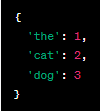

**reverse_word_index şu şekilde olacaktır:**

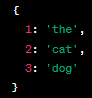

Sonrasında, word = reverse_word_index[1] satırı ile indeksi 1 olan kelime (yani 'the') word değişkenine atanır.

print(word) ifadesi, bu kelimeyi (yani 'the') ekrana yazdırır.

Bu tür işlemler genellikle metin işleme veya doğal dil işleme (NLP) görevlerinde, özellikle de derin öğrenme modellerinde kullanılır. Söz konusu işlem, genellikle best practice'lere uygun bir yaklaşımdır.

In [377]:
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}
word = reverse_word_index[1]  # 1 nolu indexte yer alan kelimeyi gosterir
print(word)

the


In [378]:
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}
word = reverse_word_index[1816]   # 1816 nolu indexte yer alan kelimeyi gosterir
print(word)

ill


In [323]:
len(X_num_tokens[105])

61

In [324]:
len(X_num_tokens[106])

7

In [325]:
len(X_num_tokens[6150])

11

Satirlardaki optimum kelime sayisini bulmamiz gerekecek.
1. Kisit en cok gecen 15.000
2. Kisit; optimum token sayisini bulmak.

Bazi satirlarda (yorumlarda) 7 token (kelime) varken bazilarinda 61 token var. Bunlari optimum bir yerde birlestirecegiz ki maliyet azalsin.

## Butun Degerlendirmelerdeki Tokenlerin Sayisini Tespit Etmek İstiyoruz

In [326]:
import numpy as np
num_tokens = [len(tokens) for tokens in X_num_tokens] # X_num_tokens deki (yorumlardaki) her bir tokeni al ve say... Her satirdaki (sentence'deki, yorumdaki) token sayisini buluyoruz.
num_tokens = np.array(num_tokens)   # mean, max etc gibi işlemleri daha rahat yapabilmek için array a çevirdik.

Bu kod, bir metin veri kümesindeki her bir örneğin kelime sayısını hesaplamak için bir döngü kullanır ve ardından elde edilen sayıları bir NumPy dizisine dönüştürür.

İşlevin adımları aşağıdaki şekildedir:

**num_tokens = [len(tokens) for tokens in X_num_tokens]:** Bu döngü, X_num_tokens listesindeki her bir tokens öğesi için, len(tokens) ifadesini kullanarak o örnekteki kelime sayısını hesaplar. X_num_tokens bir liste olduğunu varsayalım ve her bir öğe bir metin belgesini tokenlara bölen bir işlem tarafından dönüştürülmüş bir token dizisidir.

num_tokens = np.array(num_tokens): Hesaplanan kelime sayılarını içeren num_tokens listesini bir NumPy dizisine dönüştürmek için np.array() fonksiyonunu kullanır. Bu, sayıları daha kolay işlemek ve analiz etmek için NumPy'nin sunduğu işlevleri kullanabilmemizi sağlar.

Sonuç olarak, bu kod parçası, metin veri kümesindeki her bir örneğin kelime sayısını hesaplar ve bu sayıları bir NumPy dizisine dönüştürür. Bu, örneklere ilişkin kelime sayılarını analiz etmek ve istatistiksel bilgileri hesaplamak için kullanılabilir.

In [327]:
num_tokens # her bir satirdaki token sayisini verecek.  Kendisi satir sayisini gosterir.

array([ 7, 63, 97, ..., 42, 85, 18])

In [328]:
random_sample = np.random.choice(num_tokens)

print(random_sample)

98


In [329]:
len(num_tokens) # 22628 satir var.

22641

**Toplam 22628 tane review var elimizde.** 

## Maximum number of tokens for all documents

In [330]:
num_tokens.mean() # satirlardaki ortalama token sayisi 60 imis.

60.160328607393666

In [331]:
num_tokens.max() # satirlardaki max token sayisi 114.

114

In [332]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz. Max tokenin oldugu satirin numarasini gorelim.

16263

In [333]:
X[16263] # Max tokenin oldugu satirdaki (16263. satirdaki) yaziyi gorelim.

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [334]:
len(X_num_tokens[16263]) # optimum token sayisini oyle ayarlayalim ki mevcut tokenlerin %98'ini kapsasin.

114

In [335]:
max_tokens = 104 # Burada verdigimiz token sayisina gore alttaki satirda mevcut datanin % kacinin temsil edildigini (kapsandigini) gorecegiz.

In [336]:
sum(num_tokens < max_tokens) / len(num_tokens)  

0.9769003135903891

**Review lerin %98'ini analize dahil edebilmemiz icin opt review uzunlugunu 104 almamiz gerekiyor.**

## Fixing token counts of all documents (pad_sequences)

**pad_sequences**; az olanlari 0 koyarak, cok olanlarin bas kisimlarini keserek hepsini optimum token sayisinda esitler.

In [337]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)   # sabitleme, 0 koyarak eksik olanlari 104'e esitleyecek. Insanlarin ana duygulari cumlenin sonunda yer aliyor, bu nedenle 104'ten fazla olanlarin bas kisimlari kesilecek, son 104 kelime kalcak.

In [338]:
X_pad.shape

(22641, 104)

In [339]:
np.array(X_num_tokens[800]) # OR; 800. index'e sahip review 19 token'den olusuyordu.  

array([  5,   6,  16, 535,  10, 657,   3,  75,   2,  38,  48,   3, 698,
         3, 281,  46,  80,  31, 153])

In [340]:
X_pad[800] # Bunu 104'e esitleyebilmek icin bas kisimalrina 0'lar ekledi.

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   5,   6,  16, 535,  10, 657,
         3,  75,   2,  38,  48,   3, 698,   3, 281,  46,  80,  31, 153])

In [341]:
np.array(X_num_tokens[16263]) # 114 kelime olan yorum idi bu.

array([   2,   21,  748,  217,    2,   21,    1,   85,    3,  148,   13,
          7,  472,   76,    2,  196,    1,  441,  217,   20,  359,   64,
          2,  502,    8,   17,  485,  108,    8,  180,   59,   11,   36,
        109,    4,   81,    9,    4,   25,  419,    9,    4,  245,   62,
        410,   42,  120,   67,    4,   81,    8,  180,   16,    2,  106,
          5,    9,    1,  127,  793,    2,  121,  751,  118,    1,   25,
         11,    5,  159,   28,    2,   15, 1542,   13,    1,   25,    2,
       3927, 1700,    1,   22,    3,    5,   15,    4,   81,   33,    4,
       1321,    1,   25,    6,   52,   71,   50,   40,   27,    1,  491,
         79,  635,   37,  572,  152,   43,    4,   22,   37,  260,   50,
         40,   27,  109,    4])

In [342]:
X_pad[16263]   # Uzun olanlarda son 104'u aliyor..

array([  13,    7,  472,   76,    2,  196,    1,  441,  217,   20,  359,
         64,    2,  502,    8,   17,  485,  108,    8,  180,   59,   11,
         36,  109,    4,   81,    9,    4,   25,  419,    9,    4,  245,
         62,  410,   42,  120,   67,    4,   81,    8,  180,   16,    2,
        106,    5,    9,    1,  127,  793,    2,  121,  751,  118,    1,
         25,   11,    5,  159,   28,    2,   15, 1542,   13,    1,   25,
          2, 3927, 1700,    1,   22,    3,    5,   15,    4,   81,   33,
          4, 1321,    1,   25,    6,   52,   71,   50,   40,   27,    1,
        491,   79,  635,   37,  572,  152,   43,    4,   22,   37,  260,
         50,   40,   27,  109,    4])

## Train Test Split

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=0)

 ## Manuel DL Modelling
 
En cok kullanilan 15,000 kelime bizim feature lerimiz oldu.

Bunlari birer vektor olarak gordugumuzde, her bir feaurede (tokende) 50 tane agirlik olsun diyoruz **asagidki satirda**.

Son durumda;

1) En cok gecen 15.000 kelimeyi aldik

2) Her satirda optiim 104 kelime gecmesini kabul ettik.

3) Her bir kelime 50 ozellik ile tanimlanmis olsun dedik.

Embedding_size--> 50 herbir vektorde 50 ozellik gomulu

Her rowun icinde 104 tane feature/token var.

Herbir feature herbir vector demek, herbirinde 50 ozellik, yani embedding_size var.

In [346]:
embedding_size = 50   # Bu degeri degistirerek overfitting sorununun onune gecebiliriz

In [213]:
# pip install -U numpy==1.19.5   # bu aşamada problem yaşarsan bunu kurabilirsin

### Manuel DL Model

In [347]:
from tensorflow.keras.layers import Embedding, Dropout, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Embedding(input_dim=num_words,       #ilk 15000
                    output_dim=embedding_size, #50
                    input_length=max_tokens))  #104

# Pre-train degil.
# Resim olmadigi icin CNN kisimlarini eklemedik


# İlk gizli katman
model.add(Bidirectional(LSTM(units=48, return_sequences=True)))
model.add(Dropout(0.2))

# İkinci gizli katman
model.add(Bidirectional(LSTM(units=24, return_sequences=True)))
model.add(Dropout(0.2))

# Üçüncü gizli katman
model.add(Bidirectional(LSTM(units=12)))

model.add(Dense(1, activation='sigmoid'))

### Optimizer

In [348]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.01)    # Overfitting'i onlemek icin burada degisiklik yapilabilir

### Compile the Model

In [349]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

### Summary

In [350]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 104, 50)           750000    
                                                                 
 bidirectional (Bidirection  (None, 104, 96)           38016     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 104, 96)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 104, 48)           23232     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 104, 48)           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 24)                5

### Early Stop

In [351]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",   #mode= auto da trendi takip eder.
                           verbose=1, patience = 2, restore_best_weights=True)

**mode:** İzlenen metriğin maksimum veya minimum değerine karar vermek için kullanılır. **"max"** olarak ayarlandığında, monitör metriği maksimize edilmeye çalışılır (örneğin, doğrulama doğruluğu). **"min"** olarak ayarlandığında ise metrik minimize edilmeye çalışılır (örneğin, doğrulama kaybı).

### Make Balanced

In [352]:
from sklearn.utils import class_weight     # DENGESİZ BİR DATA OLDUĞU İÇİN YENİ BİR AĞIRLANDIRMA YAPILIYOR.
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61061291, 2.76013411])

class_weight.compute_sample_weight fonksiyonu, dengesiz veri kümesi üzerinde sınıf ağırlıklarının hesaplanmasını sağlar. Bu işlev, veri kümesindeki sınıflar arasındaki dengesizliği ele almak için kullanılır. Her bir veri örneği için hesaplanan ağırlıklar, modelin nadir sınıfları daha fazla vurgulayarak doğruluk oranını artırmasına yardımcı olabilir.

Parametrelerin anlamları:

**class_weight:** Sınıf ağırlıklarının nasıl hesaplanacağını belirleyen bir parametre. "balanced" olarak ayarlandığında, sınıflar arasındaki dengesizliği otomatik olarak tespit ederek ağırlıkları hesaplar. Diğer bir seçenek, özel bir sözlük kullanarak sınıflara özel ağırlıklar belirtmektir. y: Etiketlerin (hedef değişken) dizisi. class_weight.compute_sample_weight işlevi, her bir veri noktası için hesaplanan sınıf ağırlıklarını döndürür. Bu ağırlıklar, sınıf etiketlerine bağlı olarak değişir ve dengesiz veri kümesinde nadir sınıflara daha büyük bir ağırlık verir.

**pd.Series(classes_weights).unique()** kodu, hesaplanan sınıf ağırlıklarını benzersiz değerler olarak döndürür. Bu, ağırlıkların farklı sınıflar için nasıl değiştiğini görmemizi sağlar.

https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

### Fit the Model

In [353]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
71/71 [==============================] - 166s 2s/step - loss: 0.5375 - recall: 0.7199 - val_loss: 0.4012 - val_recall: 0.8256
Epoch 2/10
71/71 [==============================] - 155s 2s/step - loss: 0.3636 - recall: 0.8601 - val_loss: 0.3820 - val_recall: 0.9012
Epoch 3/10
71/71 [==============================] - 158s 2s/step - loss: 0.2937 - recall: 0.9028 - val_loss: 0.3159 - val_recall: 0.8232
Epoch 4/10
71/71 [==============================] - 148s 2s/step - loss: 0.2428 - recall: 0.9281 - val_loss: 0.3860 - val_recall: 0.8573
Epoch 4: early stopping


### Model Evaluation

In [354]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.537496  0.719902  0.401160    0.825610
1  0.363556  0.860104  0.381969    0.901219
2  0.293708  0.902774  0.315927    0.823171
3  0.242815  0.928071  0.385964    0.857317

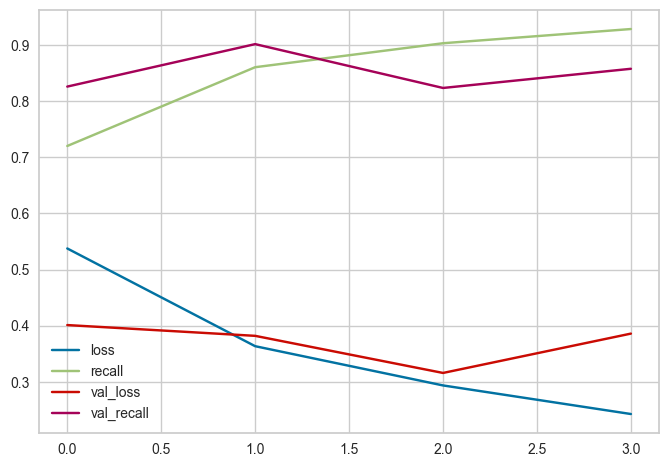

In [355]:
model_loss.plot();

In [356]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 48s 85ms/step - loss: 0.3131 - recall: 0.9528


[0.3131289482116699, 0.9527583122253418]

In [357]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 12s 87ms/step - loss: 0.3820 - recall: 0.9012


[0.3819694221019745, 0.9012194871902466]

In [358]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print("-------------------TEST-------------------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("*********************************************************")

y_train_pred = model.predict(X_train) >= 0.5

print("---------------------TRAIN---------------------------")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

142/142 [==============================] - 16s 91ms/step
-------------------TEST-------------------------------
[[2950  759]
 [  81  739]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      3709
           1       0.49      0.90      0.64       820

    accuracy                           0.81      4529
   macro avg       0.73      0.85      0.76      4529
weighted avg       0.89      0.81      0.83      4529

*********************************************************
566/566 [==============================] - 56s 100ms/step
---------------------TRAIN---------------------------
[[12307  2524]
 [  155  3126]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14831
           1       0.55      0.95      0.70      3281

    accuracy                           0.85     18112
   macro avg       0.77      0.89      0.80     18112
weighted avg       0.91      0.85      0.87     18112



142/142 [==============================] - 12s 86ms/step


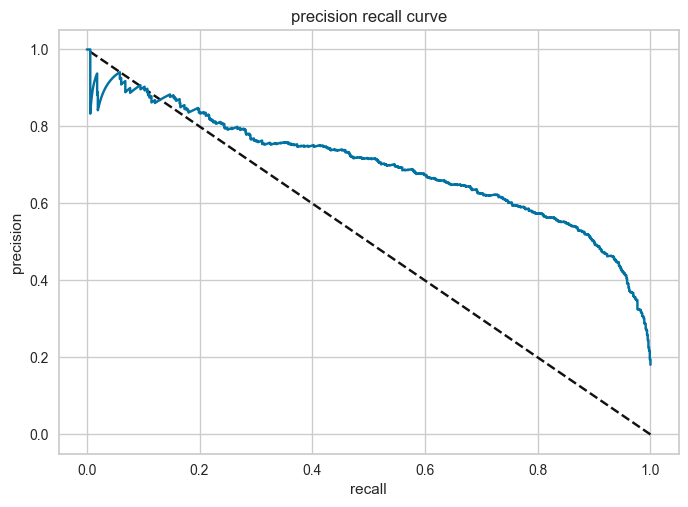

In [359]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba,)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [360]:
average_precision_score(y_test, y_pred_proba)

0.6966004916947169

### Model Saving

In [363]:
# Modeli kaydedelim ve Streamlit'te kullanalim;
dump(nb, '7.ManelDL.joblib')

['7.ManelDL.joblib']

In [362]:
model.save('7.ManuelDL.h5')

## Pre-Trained DL Modelling with GloVe

In [229]:
#pip install gensim

In [364]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors  

In [371]:
glove_model = 'glove.6B.100d.txt'

In [372]:
word2vec = 'glove.6B.100d.glove'
glove2word2vec(glove_model, word2vec)

(400000, 100)

In [373]:
from gensim.models import KeyedVectors

# GloVe modelini yükleyin (Word2Vec formatına dönüştürmüş olsanız bile kullanabilirsiniz)
glove_model = KeyedVectors.load_word2vec_format('glove.6B.100d.glove', binary=False)

In [387]:
import numpy as np

embedding_dim = 100  # GloVe kelime gömme vektörlerinin boyutu
embedding_matrix = np.zeros((num_words, embedding_dim))  # num_words, kelime sayısına eşit olmalı

for word, i in word_index.items():
    if i >= num_words:
        continue    
    if word in glove_model:
        embedding_vector = glove_model[word]
        embedding_matrix[i] = embedding_vector

In [388]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    input_length=max_tokens,
                    weights=[embedding_matrix],  # GloVe vektörleri
                    trainable=False))  # Gömme (Embeding) katmanını eğitme diyoruz. 

#----------ANN----------

# İlk gizli katman
model.add(Bidirectional(LSTM(units=48, return_sequences=True)))
model.add(Dropout(0.2))

# İkinci gizli katman
model.add(Bidirectional(LSTM(units=24, return_sequences=True)))
model.add(Dropout(0.2))

# Üçüncü gizli katman
model.add(Bidirectional(LSTM(units=12)))

model.add(Dense(1, activation='sigmoid'))

### Optimizer

In [389]:
optimizer = Adam(learning_rate=0.01)    # OVERFITTING İÇİN DEĞİŞİKLİK YAPABİLİRİZ.

### Compile the Model

In [390]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

### Summary

In [391]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 104, 100)          1500000   
                                                                 
 bidirectional_3 (Bidirecti  (None, 104, 96)           57216     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 104, 96)           0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 104, 48)           23232     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 104, 48)           0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 24)               

### Early Stop

In [392]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",   #mode= auto da trendi takip eder.             
                           verbose=1, patience = 2, restore_best_weights=True)

### Make Balanced

In [393]:
from sklearn.utils import class_weight     # DENGESİZ BİR DATA OLDUĞU İÇİN YENİ BİR AĞIRLANDIRMA YAPILIYOR.
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61061291, 2.76013411])

### Fit the Model

In [394]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
71/71 [==============================] - 143s 2s/step - loss: 0.5779 - recall: 0.6977 - val_loss: 0.5090 - val_recall: 0.8707
Epoch 2/10
71/71 [==============================] - 133s 2s/step - loss: 0.4210 - recall: 0.8302 - val_loss: 0.3829 - val_recall: 0.8634
Epoch 3/10
71/71 [==============================] - 136s 2s/step - loss: 0.3711 - recall: 0.8595 - val_loss: 0.3298 - val_recall: 0.8293
Epoch 3: early stopping


### Model Evaluation

In [395]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.577867  0.697653  0.508951    0.870732
1  0.420956  0.830235  0.382930    0.863415
2  0.371104  0.859494  0.329847    0.829268

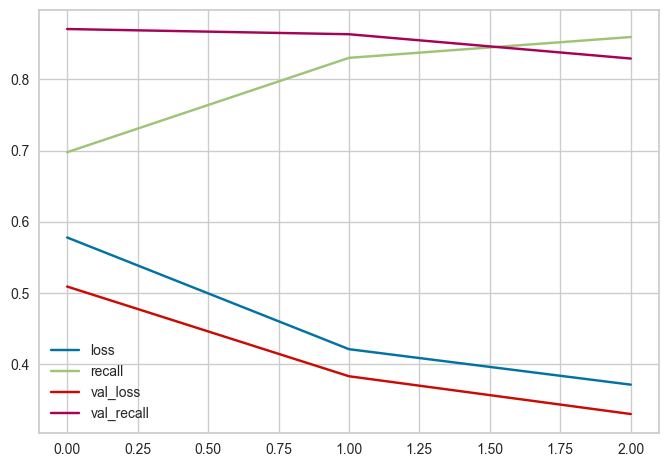

In [396]:
model_loss.plot();

In [397]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 27s 47ms/step - loss: 0.5105 - recall: 0.8656


[0.5104676485061646, 0.8655897378921509]

In [398]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 7s 51ms/step - loss: 0.5090 - recall: 0.8707


[0.5089503526687622, 0.8707317113876343]

In [399]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print("-------------------TEST-------------------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("*********************************************************")

y_train_pred = model.predict(X_train) >= 0.5

print("---------------------TRAIN---------------------------")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

142/142 [==============================] - 9s 45ms/step
-------------------TEST-------------------------------
[[2744  965]
 [ 106  714]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      3709
           1       0.43      0.87      0.57       820

    accuracy                           0.76      4529
   macro avg       0.69      0.81      0.70      4529
weighted avg       0.87      0.76      0.79      4529

*********************************************************
566/566 [==============================] - 29s 52ms/step
---------------------TRAIN---------------------------
[[10872  3959]
 [  441  2840]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     14831
           1       0.42      0.87      0.56      3281

    accuracy                           0.76     18112
   macro avg       0.69      0.80      0.70     18112
weighted avg       0.86      0.76      0.78     18112



**Yorum:** Pre-trained DL modeli (0.86),  manueld DL modelden (0.80) daha iyi sonuc verdi. 

142/142 [==============================] - 7s 51ms/step


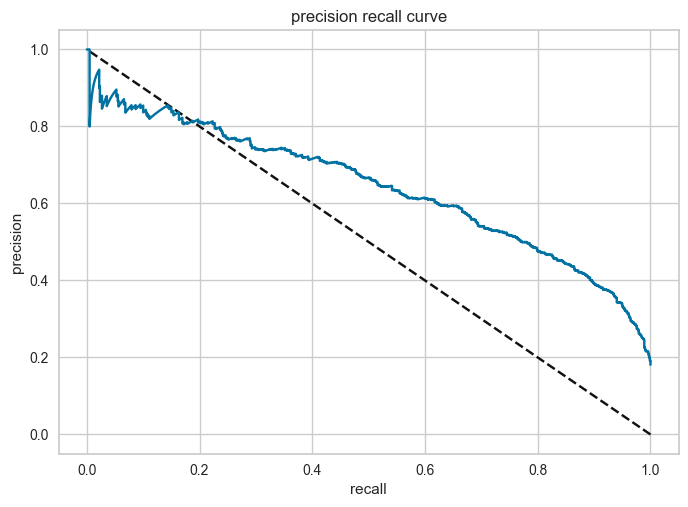

In [400]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba,)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [401]:
average_precision_score(y_test, y_pred_proba)

0.6416440759453452

### Model Saving

In [402]:
# Modeli kaydedelim ve Streamlit'te kullanalim;
dump(model, '8.GloVe.joblib')

['8.GloVe.joblib']

In [403]:
model.save('8.GloVe.h5')

### Loading Model

In [404]:
from tensorflow.keras.models import load_model
model_review = load_model('8.GloVe.h5')

### Predicton

**ChatGPT'ye "Can you give me 10 women clothes review examples?" ile 10 tane review ornegi urettirdim.**

**Bu yorummlari ve skor karsiliklarini asagida veriyoprum ki modelin yapacagi predictions ile karsilastirabilelim.** 

In [414]:
review1 = "The fit is perfect and the material feels luxurious. A must-have for any wardrobe"
review2 = "Love the floral print and the light fabric, but it runs a bit long"
review3 = "The color faded after just one wash. Not what I expected for the price"
review4 = "The fabric is breathable and it looks very professional. Pairs well with a blazer"
review5 = "Comfortable, but the material is a bit too thin for my liking"
review6 = "Keeps me warm and looks stylish, but the zipper gets stuck sometimes"
review7 = "These shoes are gorgeous but incredibly uncomfortable. Couldn't wear them for more than an hour"
review8 = "The cut is flattering and the skirt is just the right length. Very happy with this purchase"
review9 = "Soft and cozy, but it started to pill after a few wears"
review10 = "Provides excellent support during high-impact activities. Highly recommend"
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10]
actual_recommend = [0,0,1,0,0,0,1,0,1,0]

In [415]:
tokens = tokenizer.texts_to_sequences(reviews) # yeni review leri tokenize edelim. Yorumlarin sonunda noktalama isareti olunca hata veriyor.

In [416]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(10, 104)

In [417]:
(model_review.predict(tokens_pad) >0.5).astype("int")

1/1 [==============================] - 0s 71ms/step


array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [418]:
# Bunlari df yapip karsilastiralim; 

# Sample actual and predicted values
actual_recommend = [0,0,1,0,0,0,1,0,1,0]
predict = [0,0,1,0,0,0,0,0,0,0]  # Replace this with your actual prediction values

# Create a DataFrame to display the values side by side
df_comparison = pd.DataFrame({
    'Actual': actual_recommend,
    'Predicted': predict})
df_comparison

Actual  Predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          0
5       0          0
6       1          0
7       0          0
8       1          0
9       0          0

**Pre-Trained model yapilan olumsuz review'leri tahmin etmede yeterince basarili olamamistir. 3 olumsuzdan sadece 1 tanesini dogru bilebilmistir. Bu durumun nedeninin; veri setinde oluimsuz yorumlarin cok az olmasi oldugu degerlendirilmektedir.**

# BERT Model

**Transformers uzerinden calisiyor. pre-train kismini HugingFace den aldik.**

**Ayni analiz Colab uzerinde BERT modeli ile de yapildi.**

**BERT model traine %96, testte %89 accuracy gosterdi.**

In [ ]:
# The End  :)